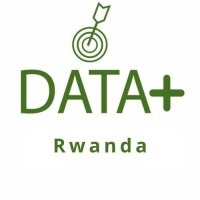
# Final Project
---

Attempt the following questions using the 2023 Labor Force Data and identify variables to use from the variable description file.

Write a short narrative for each summary or plot.

## Load the 2023 Labor Force data in Python

In [2]:
import pandas as pd 
import json 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as plt 
import numpy as np 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install statsmodels


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
df = pd.read_csv("c:\\users\\Gustave\\Desktop\\RW_LFS2023.csv", encoding='latin1')

1. What is the employment rate by gender?

In [5]:
print(df.isnull().sum())
print(df.dtypes)
print(df.head())
print(df.describe(include='all'))
df_clean = df.dropna()
df_filled = df.fillna(0)

PSU_NO            0
QH_NO             0
HHID              0
pid               0
province          0
              ...  
indd01        49635
indd03        49635
inde02        71491
age3_16_30    52868
YUR1          61118
Length: 239, dtype: int64
PSU_NO          int64
QH_NO           int64
HHID            int64
pid             int64
province       object
               ...   
indd01         object
indd03         object
inde02         object
age3_16_30     object
YUR1          float64
Length: 239, dtype: object
   PSU_NO  QH_NO    HHID       pid     province Code_UR    code_dis  LFS_year  \
0    5802      1  580201  58020101  Kigali city   Rural  Nyarugenge      2023   
1    5802      1  580201  58020102  Kigali city   Rural  Nyarugenge      2023   
2    5802      1  580201  58020103  Kigali city   Rural  Nyarugenge      2023   
3    5802      2  580202  58020201  Kigali city   Rural  Nyarugenge      2023   
4    5802      2  580202  58020202  Kigali city   Rural  Nyarugenge      2023   

Employment Rate by Gender:
A01
Female    58.407289
Male      44.176560
Name: LU4, dtype: float64


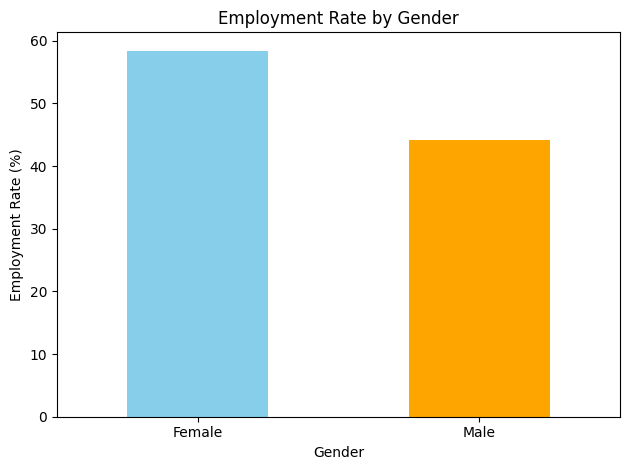

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 

# Data cleaning: drop rows with missing values in key columns
df_clean = df.dropna(subset=['A01', 'LU4'])

# Calculate employment rate by gender
employment_rate_by_gender = df_clean.groupby('A01')['LU4'].apply(lambda x: (x == 100.0).mean() * 100)
print("Employment Rate by Gender:")
print(employment_rate_by_gender)

# Bar plot for employment rate by gender
employment_rate_by_gender.plot(kind='bar', color=['skyblue', 'orange'])
plt.ylabel('Employment Rate (%)')
plt.xlabel('Gender')
plt.title('Employment Rate by Gender')
plt.xticks(rotation=0)
plt.tight_layout()  # Optional: improves layout
plt.show()




The bar plot shows that females have a higher employment rate than males in the 2023 Labor Force Survey data. This suggests women are more likely to be employed than men in this dataset.

2.	What is the unemployment rate by region?

Unemployment Rate by Region:
province
Eastern Province     50.413094
Kigali city          55.676836
Northern Province    44.156678
Southern Province    46.139295
Western Province     39.449702
Name: LU4, dtype: float64


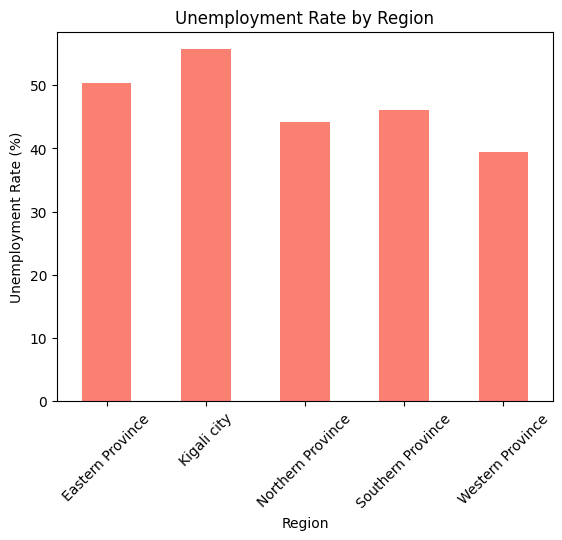

In [15]:
# Data cleaning: drop rows with missing values in key columns
df_clean = df.dropna(subset=['province', 'LU4'])

# Calculate unemployment rate by region
unemployment_rate_by_region = df_clean.groupby('province')['LU4'].apply(lambda x: (x == 0.0).mean() * 100)
print("Unemployment Rate by Region:")
print(unemployment_rate_by_region)

# Bar plot for unemployment rate by region
unemployment_rate_by_region.plot(kind='bar', color='salmon')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Region')
plt.title('Unemployment Rate by Region')
plt.xticks(rotation=45)

plt.show()

The bar plot illustrates regional differences in unemployment rates. Some regions have significantly higher unemployment, highlighting disparities in job opportunities across the country.

3.What is the average income by
education level?

Average Income by Education Level:
A09
No-no difficulty            6.268829
Yes- a lot of difficulty    2.616505
Yes-some difficulty         3.296117
can not do at all           2.314286
Name: indb1, dtype: float64


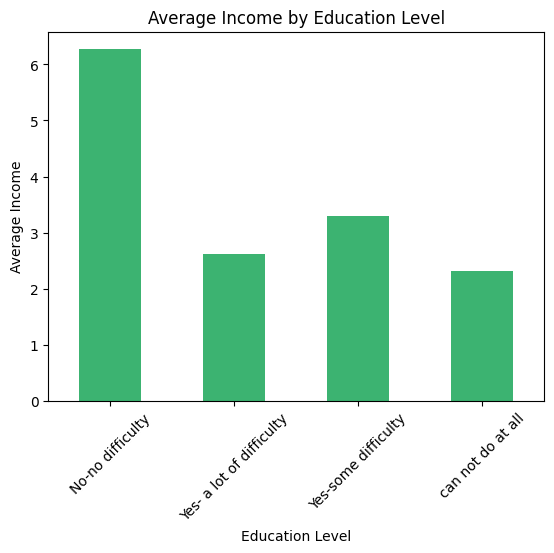

In [8]:
# Convert income column to numeric before dropping missing values
df['indb1'] = pd.to_numeric(df['indb1'], errors='coerce')
df_clean = df.dropna(subset=['A09', 'indb1'])

# Average income by education level
average_income_by_education = df_clean.groupby('A09')['indb1'].mean()
print("Average Income by Education Level:")
print(average_income_by_education)

# Bar chart for average income by education level
average_income_by_education.plot(kind='bar', color='mediumseagreen')
plt.ylabel('Average Income')
plt.xlabel('Education Level')
plt.title('Average Income by Education Level')
plt.xticks(rotation=45)
plt.show()

The bar chart reveals that individuals with no difficulty in education have the highest average income, while those with more difficulty earn less. This demonstrates a positive relationship between education level and income.

4. What is the labor force participation by age group?

Labor Force Participation Rate by Age Group:
age_group
0-15     26.666667
16-30    54.412803
31-45    48.843844
46-60    50.506879
61+      52.505967
Name: LU4, dtype: float64


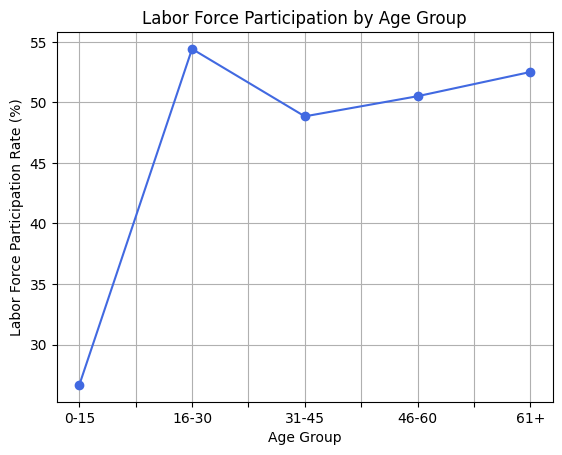

In [9]:
# Define age bins and labels
age_bins = [0, 15, 30, 45, 60, 100]
age_labels = ['0-15', '16-30', '31-45', '46-60', '61+']

# Convert age column to numeric if needed
df['A04'] = pd.to_numeric(df['A04'], errors='coerce')

# Drop rows with missing age or employment status
df_clean = df.dropna(subset=['A04', 'LU4'])

# Create age group column safely
df_clean.loc[:, 'age_group'] = pd.cut(df_clean['A04'], bins=age_bins, labels=age_labels, right=False)

# Calculate labor force participation rate by age group
lfp_by_age = df_clean.groupby('age_group')['LU4'].apply(lambda x: (x == 100.0).mean() * 100)
print("Labor Force Participation Rate by Age Group:")
print(lfp_by_age)

# Line plot for labor force participation by age group
lfp_by_age.plot(kind='line', marker='o', color='royalblue')
plt.ylabel('Labor Force Participation Rate (%)')
plt.xlabel('Age Group')
plt.title('Labor Force Participation by Age Group')
plt.grid(True)
plt.show()


The line plot shows labor force participation is lowest among the youngest group (0-15) and peaks for ages 16-30. Participation remains relatively stable for older age groups, indicating young adults are most active in the labor force.

5. What sector employs the most people?

Number of people employed by sector:
indd03
Agriculture forestry and fishing                                         7426
Whole sale and retail trade; repair of motor vehicles and motorcycles    3520
Construction                                                             2424
Transportationa and storage                                              1381
Manufacturing                                                            1318
Ativities of house13holds as employers                                   1275
Education                                                                 983
Accommodation and food services activities                                738
Other services                                                            738
Administrative and support activities                                     518
Public administration and defense; compulsory social security             442
Mining and quarrying                                                      391
Human health and soc

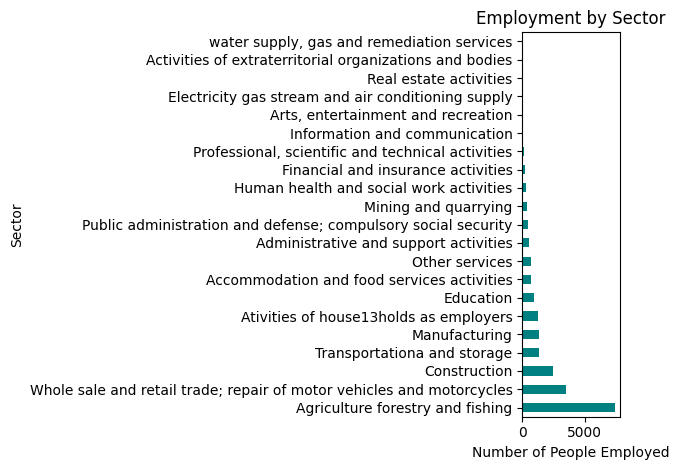

In [10]:
# Count number of people employed in each sector (industry)
sector_counts = df['indd03'].value_counts().dropna()

print("Number of people employed by sector:")
print(sector_counts)

# Horizontal bar plot for sector employment
sector_counts.plot(kind='barh', color='teal')
plt.xlabel('Number of People Employed')
plt.ylabel('Sector')
plt.title('Employment by Sector')
plt.tight_layout()
plt.show()

The horizontal bar plot shows which sector employs the most people. The sector with the longest bar has the highest employment in the dataset.

6. What is the gender distribution in each sector?

Gender distribution in each sector:
A01                                                 Female  Male
indd03                                                          
Accommodation and food services activities             352   386
Activities of extraterritorial organizations an...       7    23
Administrative and support activities                  182   336
Agriculture forestry and fishing                      4081  3345
Arts, entertainment and recreation                      20    51
Ativities of house13holds as employers                 843   432
Construction                                           322  2102
Education                                              496   487
Electricity gas stream and air conditioning supply      10    32
Financial and insurance activities                     141   118
Human health and social work activities                162   163
Information and communication                           26    61
Manufacturing                                         

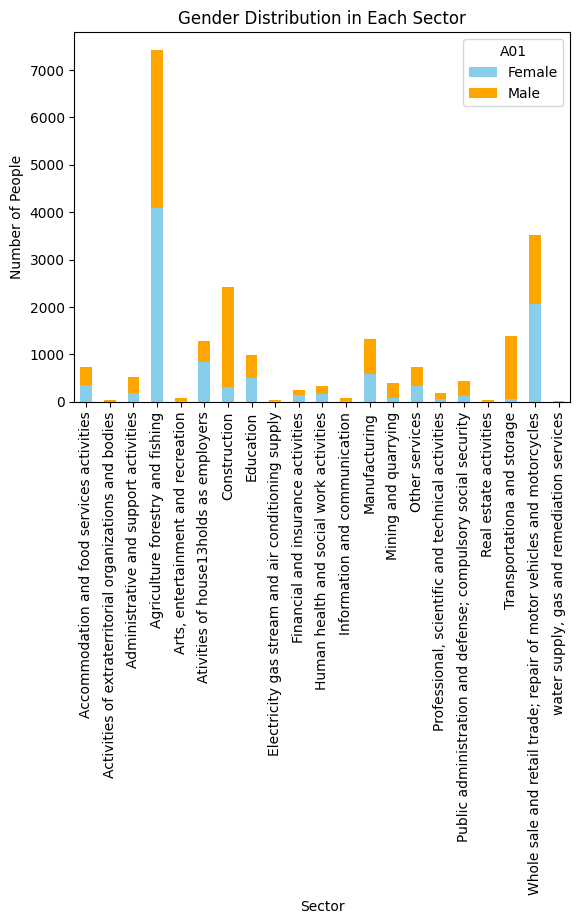

In [11]:
# Group by sector and gender, then count
sector_gender_counts = df.groupby(['indd03', 'A01']).size().unstack(fill_value=0)

print("Gender distribution in each sector:")
print(sector_gender_counts)

# Stacked bar chart for gender distribution in each sector
sector_gender_counts.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.ylabel('Number of People')
plt.xlabel('Sector')
plt.title('Gender Distribution in Each Sector')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The stacked bar chart shows the gender distribution in each sector. Each bar represents a sector, with segments for male and female counts, allowing easy comparison of gender representation across industries.

7. What’s the mean working hours by occupation?

In [17]:
print(df.columns.tolist())

['PSU_NO', 'QH_NO', 'HHID', 'pid', 'province', 'Code_UR', 'code_dis', 'LFS_year', 'weight2', 'A01', 'A02', 'A03M', 'A03Y', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10', 'A11', 'A12', 'A13', 'A14A', 'A14B', 'A15', 'A16Y', 'A17A', 'A17B', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'B01', 'B02A', 'B02B', 'B03', 'B06', 'B07', 'B08', 'B09', 'B10', 'B13', 'B13A', 'B14', 'B18', 'B19', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C09A', 'C10', 'C11A', 'C11B', 'C12A', 'C12B', 'C13A', 'C13B', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C22', 'C23', 'C24', 'C25', 'C26', 'C21', 'C21_A', 'C21_B', 'C21_C', 'C21_D', 'C21_E', 'C21_F', 'C21_G', 'C21_H', 'C21_L', 'D03A', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09A', 'D09B', 'D10A', 'D10B', 'D10C', 'D10D', 'D11', 'D12', 'D12A', 'D13', 'D14', 'D15', 'D15A', 'D16', 'D17', 'D20', 'D21', 'D23', 'D27', 'D24A', 'E11', 'E12', 'E12B', 'E13', 'F01', 'F02', 'F05', 'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', 'G01A', 'G02A', 'G03A

Mean Working Hours by Occupation:
isco2digit
5                                                                                    80.000000
Protective services workers                                                          54.130024
Information and communications technology professionals                              46.230769
Legal, social and cultural professionals                                             45.617021
Drivers and mobile plant operators                                                   45.136432
Science and engineering associate professionals                                      42.652778
Cleaners and helpers                                                                 42.321729
Hospitality, retail and other services managers                                      42.318182
Administrative and commercial managers                                               41.858407
Numerical and material recording clerks                                              40.886792
Chief

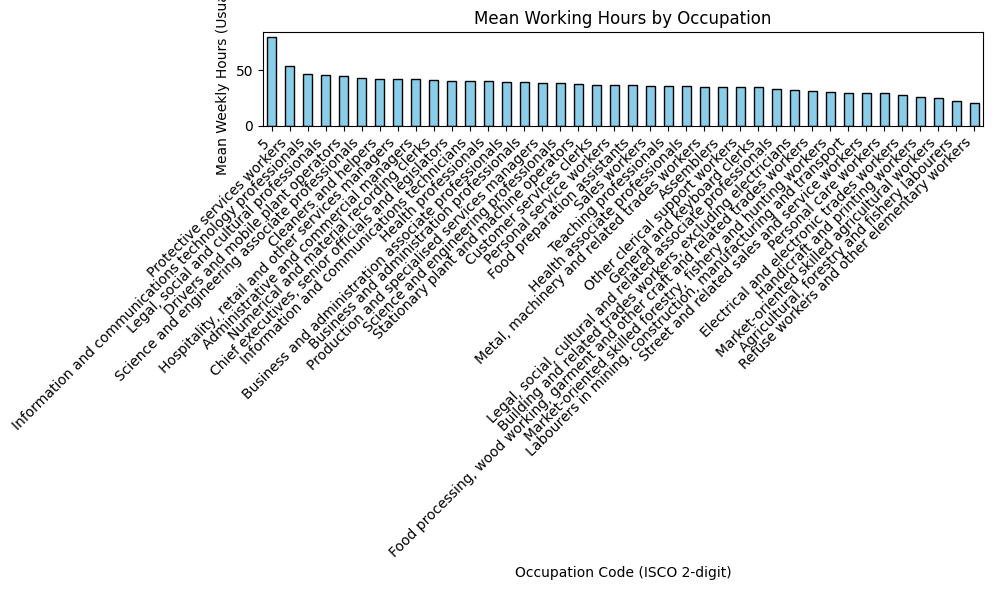

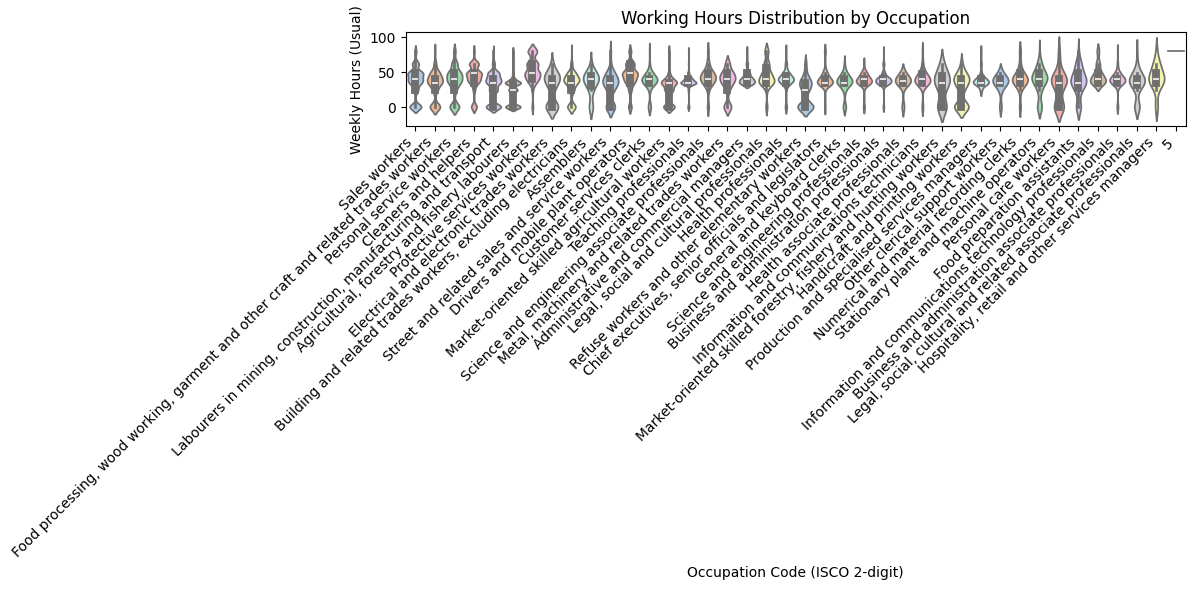

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1 — Clean 'usualhrs' to keep only numbers
df['usualhrs_clean'] = (
    df['usualhrs']
    .astype(str)                              
    .str.extract('(\d+)')                     
    .astype(float)                            
)

# Step 2 — Group by occupation and compute mean
mean_hours_by_occ = (
    df.groupby('isco2digit')['usualhrs_clean']
      .mean()
      .sort_values(ascending=False)
)

print("Mean Working Hours by Occupation:")
print(mean_hours_by_occ)

# Step 3 — Bar Chart
plt.figure(figsize=(10, 6))
mean_hours_by_occ.plot(kind='bar', color='skyblue', edgecolor='black')
plt.ylabel('Mean Weekly Hours (Usual)')
plt.xlabel('Occupation Code (ISCO 2-digit)')
plt.title('Mean Working Hours by Occupation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 4 — Violin Plot for distribution
plt.figure(figsize=(12, 6))
sns.violinplot(x='isco2digit', y='usualhrs_clean', data=df, palette='pastel')
plt.ylabel('Weekly Hours (Usual)')
plt.xlabel('Occupation Code (ISCO 2-digit)')
plt.title('Working Hours Distribution by Occupation')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



8. Income inequality by gender mean and std(income) by gender histogram

Income Mean and Std Dev by Gender:
                               mean            std
A05                                               
Divorced               74110.576667   62370.870235
Living together        56787.625945   61628.700198
Married monogamously  129102.050387  320202.947192
Married polygamous     40436.969664   49950.838902
Separated              43881.806858   66007.857309
Single                 64006.995949  105427.343821
Widow/Widower          41079.808932   60797.852853


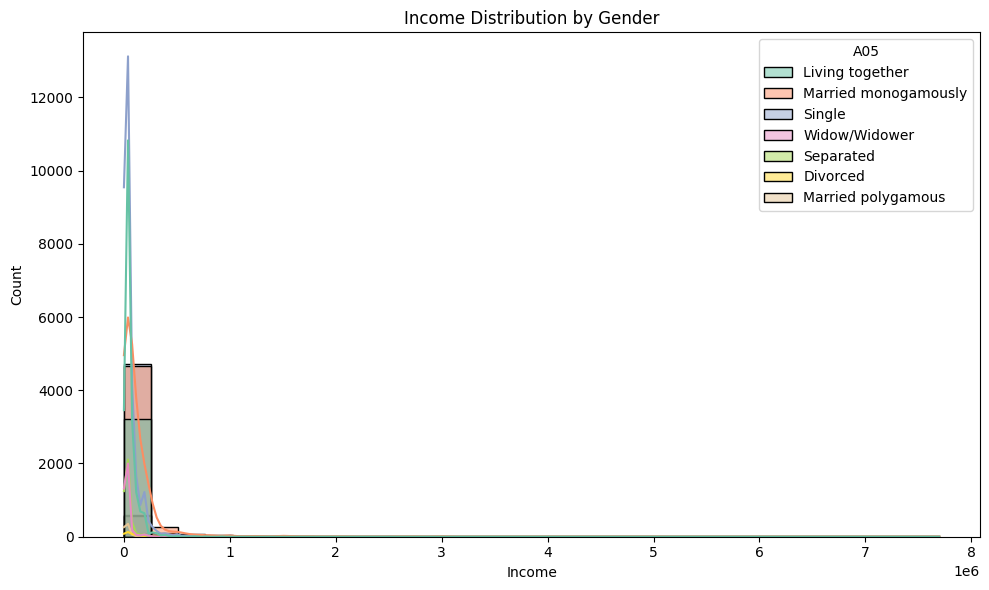

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1 — Clean income column
df['income_clean'] = (
    df['cash']  # replace with your income column
    .astype(str)
    .str.replace(r'[^0-9.\-]', '', regex=True)  # keep digits, dot, minus
    .replace(['', '.', '-', '--'], None)        # remove invalid placeholders
    .astype(float)
)

# Step 2 — Summary statistics by gender
income_stats = df.groupby('A05')['income_clean'].agg(['mean', 'std'])
print("Income Mean and Std Dev by Gender:")
print(income_stats)

# Step 3 — Histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='income_clean', hue='A05', kde=True, bins=30, palette='Set2')
plt.xlabel('Income')
plt.ylabel('Count')
plt.title('Income Distribution by Gender')
plt.tight_layout()
plt.show()



9. Distribution of unemployment by
education level unemployed x education Bar chart

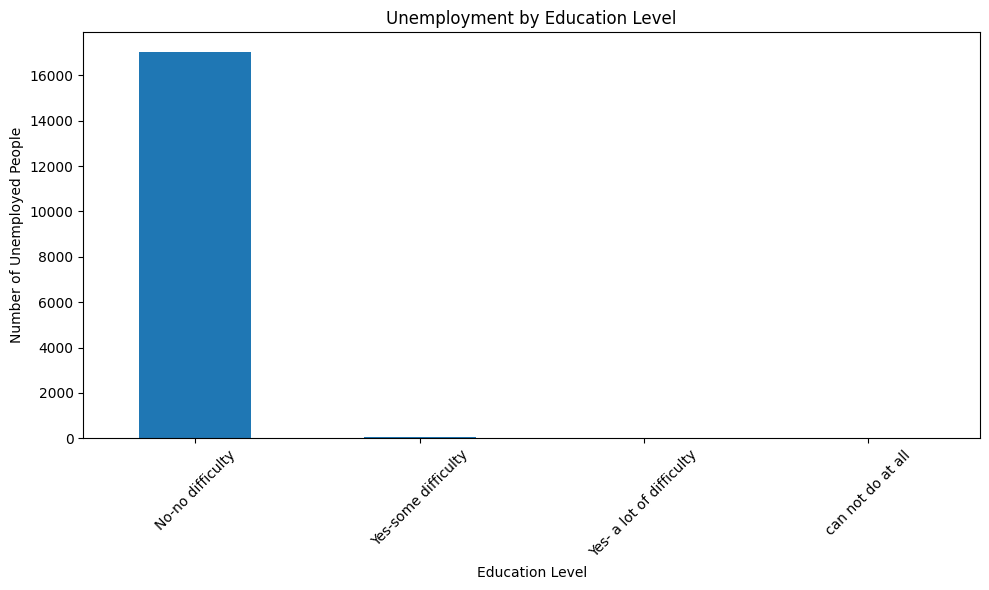

In [23]:
import matplotlib.pyplot as plt

# Filter only unemployed people
df_unemployed = df[df['LU4'] == 100.0]

# Group by education and count unemployed
unemployment_by_edu = df_unemployed.groupby('A09').size().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
unemployment_by_edu.plot(kind='bar')
plt.title('Unemployment by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Unemployed People')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



10. Who works more hours: men or
women? mean(hours_worked) x gender Boxplot

A01
Female    28.740066
Male      33.908288
Name: usualhrs_clean, dtype: float64


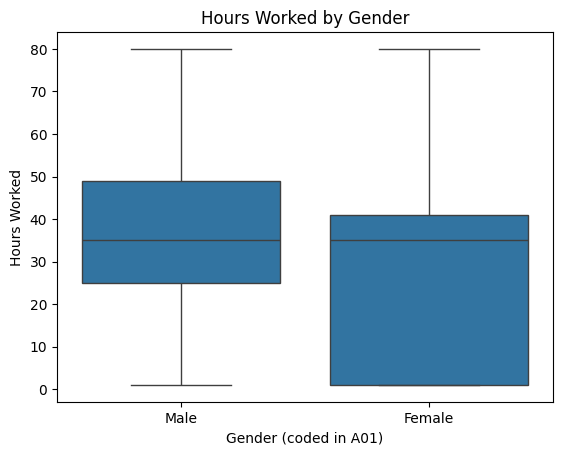

In [29]:
avg_hours = df.groupby('A01')['usualhrs_clean'].mean()
print(avg_hours)

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='A01', y='usualhrs_clean', data=df)
plt.title('Hours Worked by Gender')
plt.xlabel('Gender (coded in A01)')
plt.ylabel('Hours Worked')
plt.show()


11. Labor force by marital status employment_status x marital_status Stacked bar chart

In [39]:
# Find columns with 2 to 10 unique values (likely categorical)
candidate_cols = [col for col in df.columns if 2 <= df[col].nunique(dropna=False) <= 10]

print("Candidate categorical columns with 2-10 unique values:")
print(candidate_cols)


Candidate categorical columns with 2-10 unique values:
['province', 'Code_UR', 'A01', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10', 'A11', 'A12', 'A13', 'A14A', 'A15', 'A17A', 'A18', 'A21', 'A23', 'B01', 'B02A', 'B03', 'B06', 'B07', 'B08', 'B09', 'B13', 'B14', 'B18', 'B19', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C08', 'C09', 'C09A', 'C10', 'C12A', 'C12B', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C23', 'C25', 'C26', 'C21_A', 'C21_B', 'C21_C', 'C21_D', 'C21_E', 'C21_F', 'C21_G', 'C21_H', 'C21_L', 'D03A', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09A', 'D09B', 'D10A', 'D10B', 'D10C', 'D10D', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D20', 'D21', 'D27', 'E11', 'E12', 'E13', 'F01', 'G01A', 'G02A', 'G03A', 'G04A', 'G05A', 'G06A', 'G07A', 'H01', 'H05', 'H06', 'H09', 'H00', 'H04', 'H10', 'I01_A', 'I01_C', 'I02', 'I03', 'I07A', 'I07B', 'I07C', 'I07D', 'I07E', 'I07F', 'I07G', 'I07H', 'I07I', 'I07J', 'I07K', 'I07L', 'I07M', 'I07N', 'I07O', 'I07P', 'I07Q', 'status1', 'wap16', 'employed

In [40]:
print("Unique values in status1:")
print(df['status1'].value_counts(dropna=False))

# Check some A0x columns — start with A05 and A06 for example
print("\nUnique values in A05:")
print(df['A05'].value_counts(dropna=False))

print("\nUnique values in A06:")
print(df['A06'].value_counts(dropna=False))


Unique values in status1:
status1
NaN                    25148
Employed               22214
out of labour force    19981
Unemployed              4506
Name: count, dtype: int64

Unique values in A05:
A05
Single                  22454
NaN                     21830
Married monogamously    15192
Living together          7752
Widow/Widower            2785
Separated                1406
Married polygamous        259
Divorced                  171
Name: count, dtype: int64

Unique values in A06:
A06
No-no difficulty            61898
NaN                          9149
Yes-some difficulty           519
Yes- a lot of difficulty      255
can not do at all              28
Name: count, dtype: int64


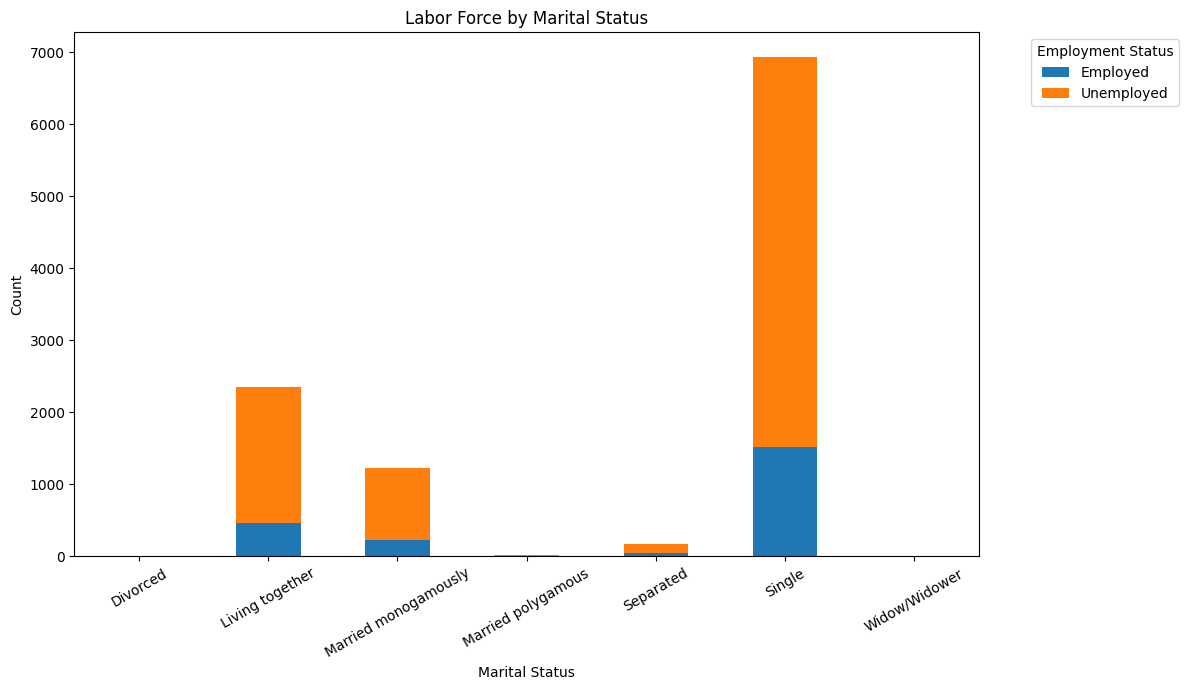

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Map employment status from YUR1 (adjust if needed)
employment_map = {
    0.0: 'Unemployed',
    100.0: 'Employed'
}

df['employment_status'] = df['YUR1'].map(employment_map)

# Clean dataset - keep only rows with valid marital status and employment status
df_clean = df.dropna(subset=['employment_status', 'A05'])

# Crosstab: counts of employment status by marital status
labor_force = pd.crosstab(df_clean['A05'], df_clean['employment_status'])

# Plot stacked bar chart
labor_force.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Labor Force by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


12. Youth unemployment rate (age < 25) Filter + status Pie chart

Youth unemployment rate (age 16-24): 23.07%


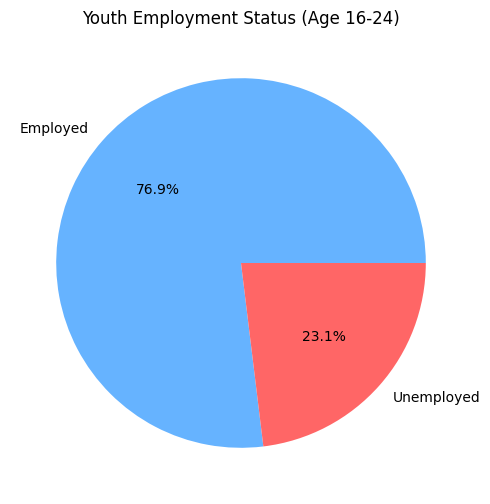

In [48]:
import matplotlib.pyplot as plt

# Map employment status from YUR1 as before
employment_map = {0.0: 'Employed', 100.0: 'Unemployed'}
df['employment_status'] = df['YUR1'].map(employment_map)

# Filter youth aged 16-24 based on age3_16_30
youth = df[df['age3_16_30'].isin(['16-19 yrs', '20-24 yrs'])]

# Filter out rows with no employment status
youth = youth[youth['employment_status'].notna()]

# Count employment statuses among youth
counts = youth['employment_status'].value_counts()

# Calculate unemployment rate
unemployed = counts.get('Unemployed', 0)
total = counts.sum()
unemployment_rate = (unemployed / total) * 100 if total > 0 else 0

print(f"Youth unemployment rate (age 16-24): {unemployment_rate:.2f}%")

# Pie chart
plt.figure(figsize=(6,6))
counts.plot.pie(autopct='%1.1f%%', labels=counts.index, colors=['#66b3ff','#ff6666'])
plt.title('Youth Employment Status (Age 16-24)')
plt.ylabel('')
plt.show()


13. Employment rate by age and gender Cross-tab age bins x gender Heatmap

In [49]:
employment_map = {0.0: 'Employed', 100.0: 'Unemployed'}
df['employment_status'] = df['YUR1'].map(employment_map)


In [50]:
df_filtered = df[df['employment_status'].notna() & df['A01'].notna() & df['age3'].notna()]


In [51]:
import pandas as pd

# Create a crosstab of counts by age group, gender, and employment status
ct = pd.crosstab(index=[df_filtered['age3'], df_filtered['A01']],
                 columns=df_filtered['employment_status'])

# Calculate employment rate = Employed / (Employed + Unemployed) * 100
ct['employment_rate'] = ct['Employed'] / (ct['Employed'] + ct['Unemployed']) * 100

# Reset index for plotting
ct = ct.reset_index()


In [52]:
heatmap_data = ct.pivot(index='age3', columns='A01', values='employment_rate')


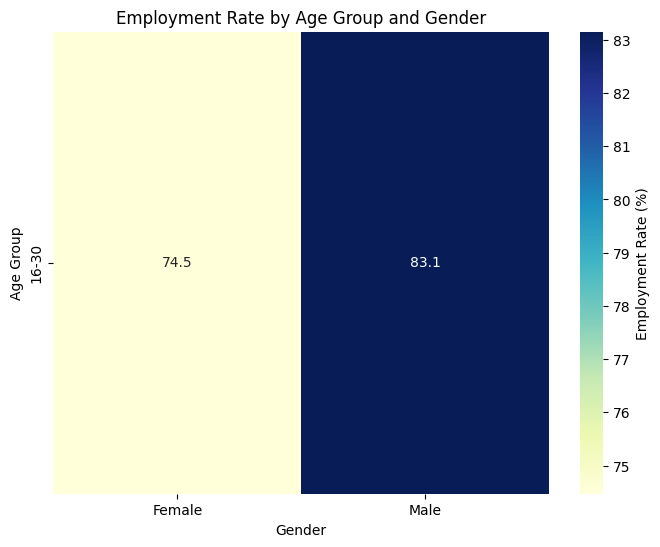

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='YlGnBu', cbar_kws={'label': 'Employment Rate (%)'})
plt.title('Employment Rate by Age Group and Gender')
plt.xlabel('Gender')
plt.ylabel('Age Group')
plt.show()


14. Regional variation in working hours mean(hours_worked) x region Bar chart

In [54]:
mean_hours_by_region = df.groupby('province')['usualhrs_clean'].mean().sort_values(ascending=False)


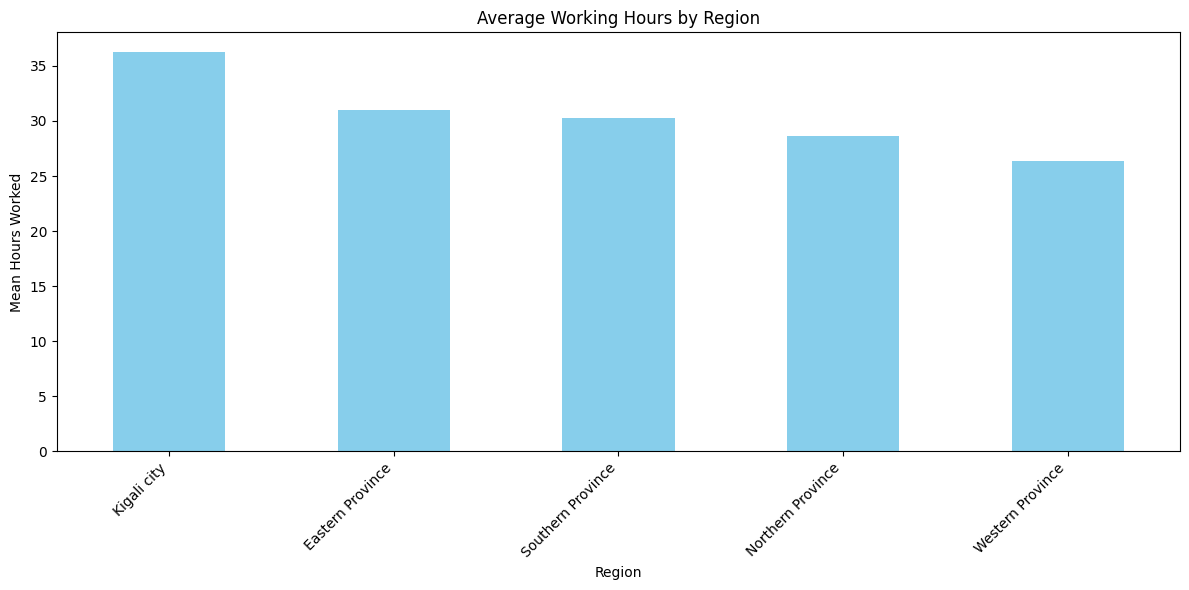

In [55]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
mean_hours_by_region.plot(kind='bar', color='skyblue')
plt.title('Average Working Hours by Region')
plt.ylabel('Mean Hours Worked')
plt.xlabel('Region')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


15. Relationship between age and
income Correlation or summary by age Scatter with trend line

In [56]:
# Map age group to approximate midpoint age
age_map = {
    '16-30': 23,
    '31-44': 37.5,
    '45-54': 49.5,
    '55-64': 59.5,
    '65+': 70,
    # add other groups if necessary
}

df['age_numeric'] = df['age3'].map(age_map)


In [57]:
# Map age group to approximate midpoint age
age_map = {
    '16-30': 23,
    '31-44': 37.5,
    '45-54': 49.5,
    '55-64': 59.5,
    '65+': 70,
    # add other groups if necessary
}

df['age_numeric'] = df['age3'].map(age_map)


In [58]:
df_clean = df.dropna(subset=['age_numeric', 'income_clean'])


In [59]:
correlation = df_clean['age_numeric'].corr(df_clean['income_clean'])
print(f"Correlation between age and income: {correlation:.2f}")


Correlation between age and income: 0.07


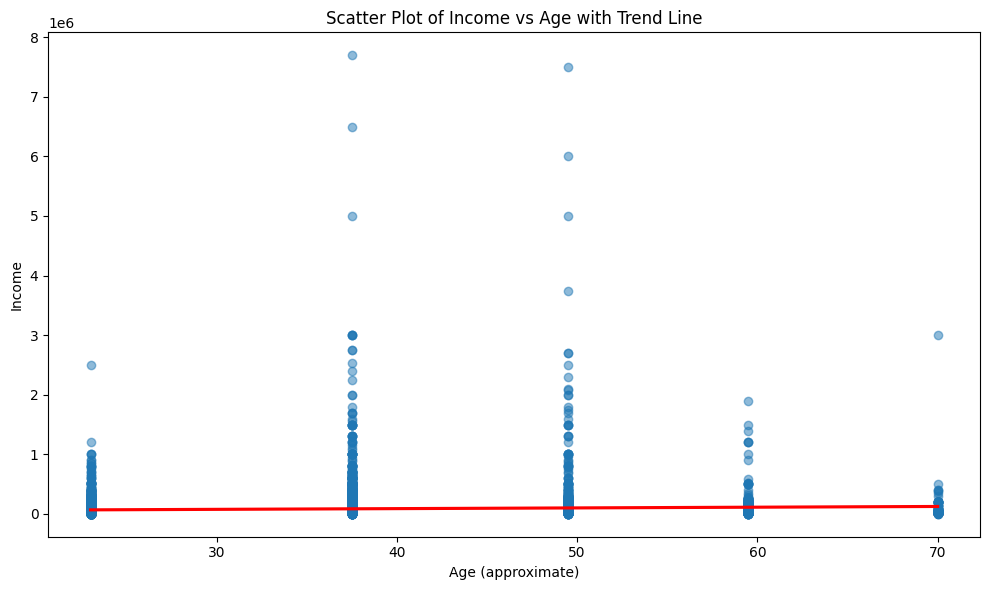

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.regplot(x='age_numeric', y='income_clean', data=df_clean, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot of Income vs Age with Trend Line')
plt.xlabel('Age (approximate)')
plt.ylabel('Income')
plt.tight_layout()
plt.show()


16. Income by sector and gender income x sector + gender Clustered bar

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by sector and gender, calculate mean income
income_sector_gender = df.groupby(['main_sect', 'A01'])['income_clean'].mean().reset_index()

# Pivot to get sectors as index and gender as columns
income_pivot = income_sector_gender.pivot(index='main_sect', columns='A01', values='income_clean')


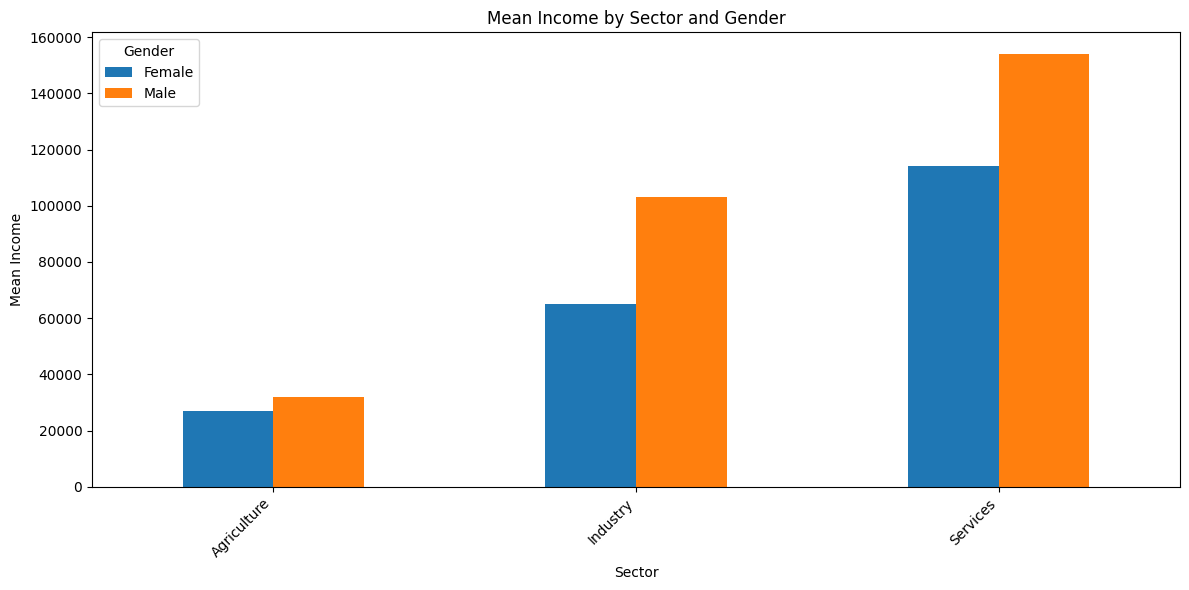

In [62]:
income_pivot.plot(kind='bar', figsize=(12,6))
plt.title('Mean Income by Sector and Gender')
plt.xlabel('Sector')
plt.ylabel('Mean Income')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


17. Median income by region median(income) x region Map or bar chart

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by region and calculate median income
median_income_region = df.groupby('province')['income_clean'].median().reset_index()
median_income_region = median_income_region.sort_values(by='income_clean', ascending=False)


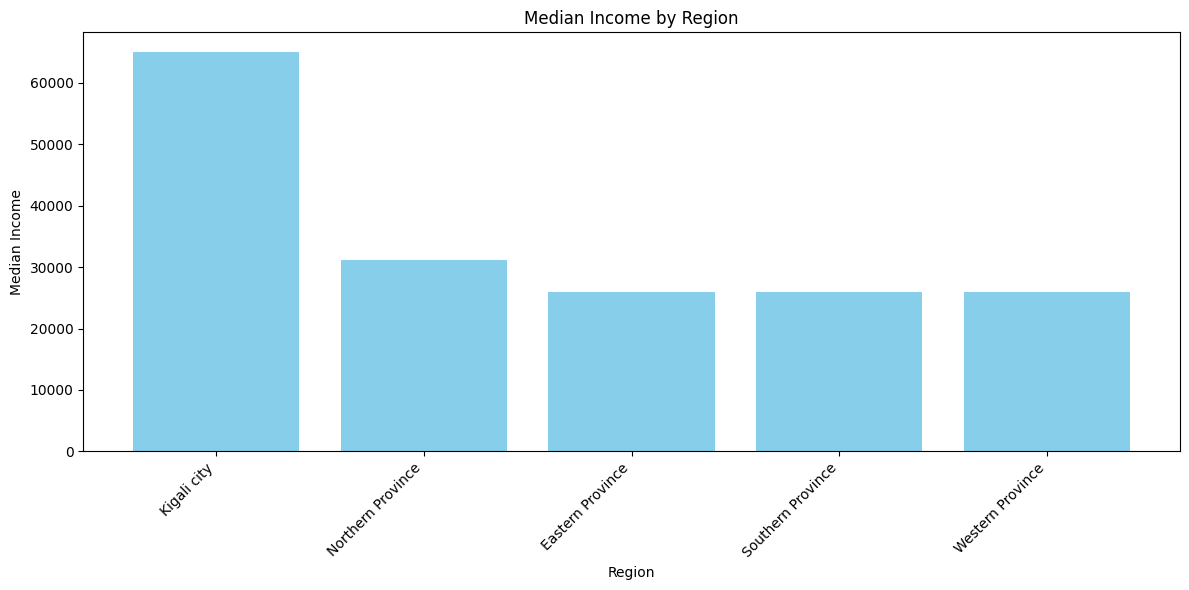

In [64]:
plt.figure(figsize=(12,6))
plt.bar(median_income_region['province'], median_income_region['income_clean'], color='skyblue')
plt.title('Median Income by Region')
plt.xlabel('Region')
plt.ylabel('Median Income')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


18. Proportion of informal vs formal jobs job_type Pie or bar

In [66]:
# Example mapping, please adjust based on your dataset documentation
def map_job_type(status):
    if status == 'Employed':
        return 'Formal'
    elif status == 'out of labour force':
        return 'Informal'
    else:
        return 'Unknown'

# Create the new column
df['job_type'] = df['status1'].map(map_job_type)


In [67]:
print(df['job_type'].value_counts(dropna=False))


job_type
Unknown     29654
Formal      22214
Informal    19981
Name: count, dtype: int64


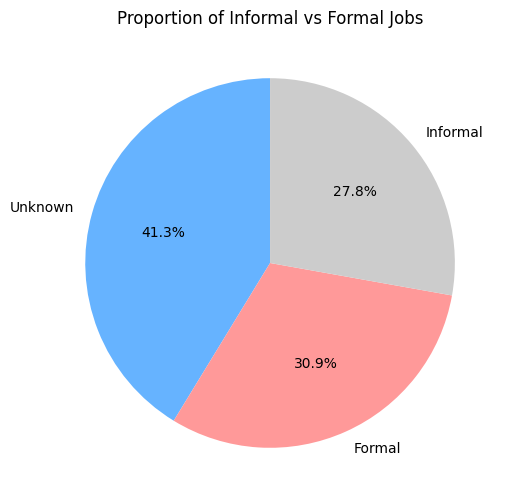

In [68]:
import matplotlib.pyplot as plt

job_counts = df['job_type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#ff9999','#cccccc'])
plt.title('Proportion of Informal vs Formal Jobs')
plt.show()


19. Sectoral employment by education sector x education Stacked bar

In [69]:
print(df['main_sect'].value_counts(dropna=False))
print(df['attained'].value_counts(dropna=False))


main_sect
NaN            49635
Services       10588
Agriculture     7426
Industry        4200
Name: count, dtype: int64
attained
NaN                45390
Primary            15274
Lower secondary     4576
Upper secondary     4292
University          2317
Name: count, dtype: int64


In [70]:
df_clean = df.dropna(subset=['main_sect', 'attained'])


In [71]:
sector_education = pd.crosstab(df_clean['attained'], df_clean['main_sect'])


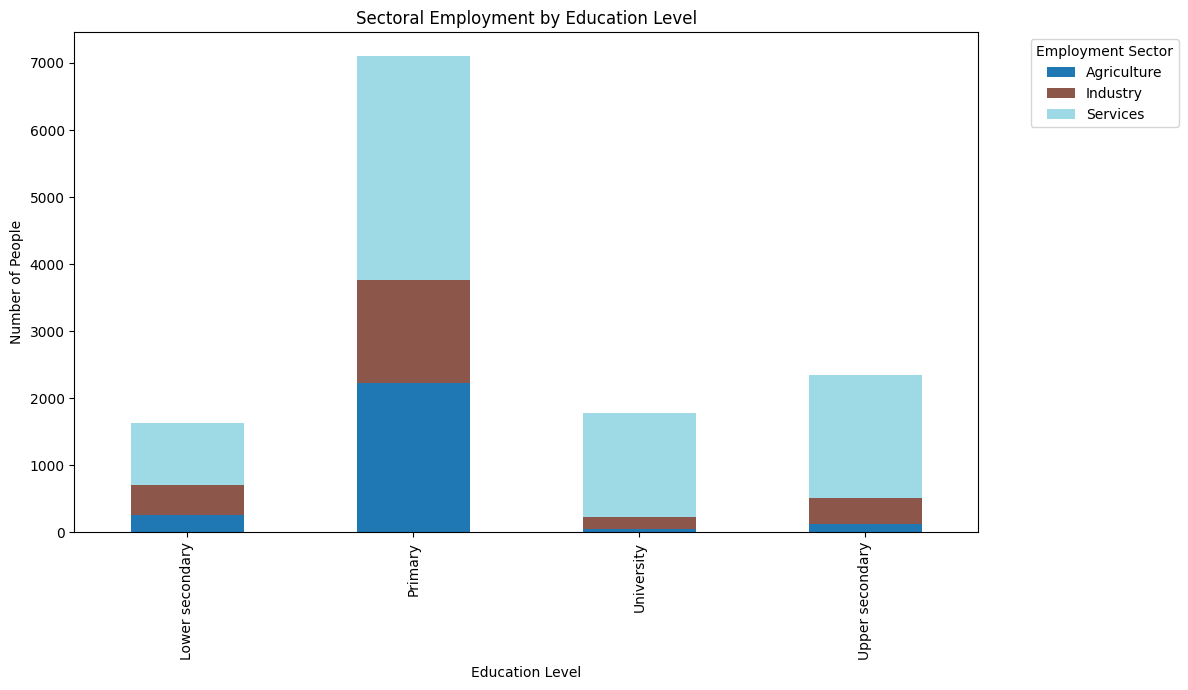

In [72]:
sector_education.plot(kind='bar', stacked=True, figsize=(12,7), colormap='tab20')

plt.title('Sectoral Employment by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of People')
plt.legend(title='Employment Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


20. Female labor force participation rate employment_status filter Bar chart

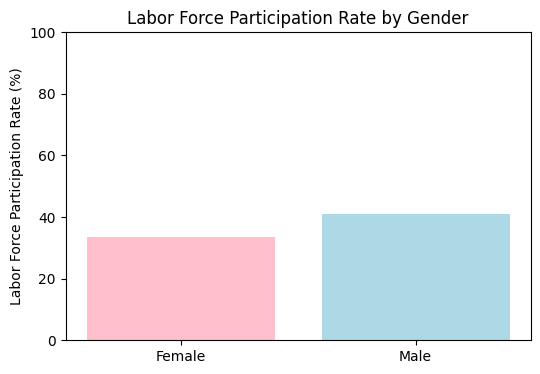

In [76]:
import matplotlib.pyplot as plt

# Filter valid labor force statuses
labor_force_statuses = ['Employed', 'Unemployed']

# Calculate participation rate function
def labor_force_participation_rate(df, gender_col, gender_value, status_col):
    df_gender = df[df[gender_col] == gender_value]
    total = df_gender.shape[0]
    in_lf = df_gender[status_col].isin(labor_force_statuses).sum()
    return (in_lf / total * 100) if total > 0 else 0

# Calculate for Male and Female
lfp_female = labor_force_participation_rate(df, 'A01', 'Female', 'status1')
lfp_male = labor_force_participation_rate(df, 'A01', 'Male', 'status1')

# Plot
plt.figure(figsize=(6,4))
plt.bar(['Female', 'Male'], [lfp_female, lfp_male], color=['pink', 'lightblue'])
plt.ylim(0, 100)
plt.ylabel('Labor Force Participation Rate (%)')
plt.title('Labor Force Participation Rate by Gender')
plt.show()



In [77]:
print(df['status1'].value_counts(dropna=False))


status1
NaN                    25148
Employed               22214
out of labour force    19981
Unemployed              4506
Name: count, dtype: int64


21. Employment by urban/rural location employment_status x location Bar chart

In [78]:
print(df['Code_UR'].unique())


['Rural' 'Urban']


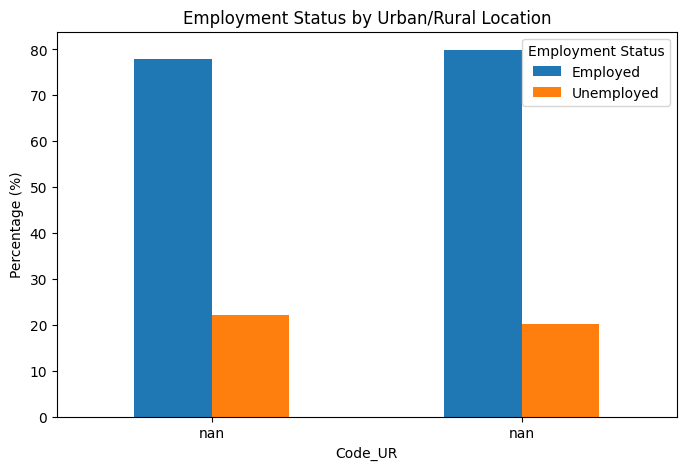

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map employment status if not already mapped
employment_map = {
    0.0: 'Not in labor force',
    100.0: 'Employed',
    # add other mappings as needed
}
if 'employment_status' not in df.columns:
    df['employment_status'] = df['YUR1'].map(employment_map)

# Filter valid rows
df_clean = df.dropna(subset=['employment_status', 'Code_UR'])

# Crosstab employment status vs urban/rural
ct = pd.crosstab(df_clean['Code_UR'], df_clean['employment_status'], normalize='index') * 100

# Rename urban/rural codes if necessary
ct.index = ct.index.map({1: 'Urban', 2: 'Rural'})

# Plot
ct.plot(kind='bar', stacked=False, figsize=(8,5))
plt.ylabel('Percentage (%)')
plt.title('Employment Status by Urban/Rural Location')
plt.xticks(rotation=0)
plt.legend(title='Employment Status')
plt.show()


22. Trends in employment over years Grouped by year Line plot

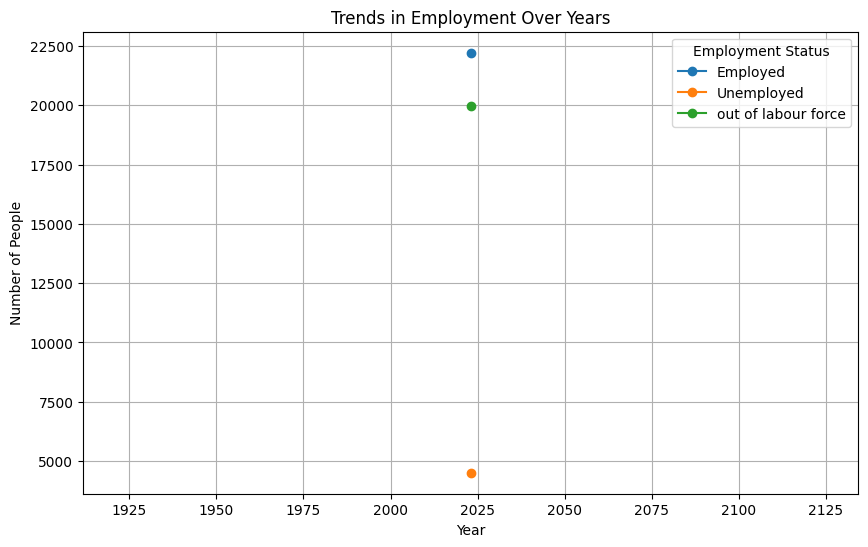

In [82]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter out rows with NaN in status1 or LFS_year
df_clean = df.dropna(subset=['LFS_year', 'status1'])

# Group by year and status, count rows
employment_trends = df_clean.groupby(['LFS_year', 'status1']).size().unstack(fill_value=0)

# Plot
employment_trends.plot(kind='line', marker='o', figsize=(10,6))
plt.title('Trends in Employment Over Years')
plt.xlabel('Year')
plt.ylabel('Number of People')
plt.grid(True)
plt.legend(title='Employment Status')
plt.show()


23. Wage gap by occupation income x occupation + gender Bar chart

In [84]:
# Check if income column exists and see sample values
print("Income column samples:")
print(df['income_clean'].head(10))

# Check occupation-related columns (e.g., 'isco2digit', 'indd01')
print("\nUnique occupation codes in 'isco2digit':")
print(df['isco2digit'].dropna().unique())

# Check gender column unique values
print("\nUnique values in 'A01' (gender):")
print(df['A01'].value_counts())

# Count rows with valid income, occupation, and gender
valid_rows = df.dropna(subset=['income_clean', 'isco2digit', 'A01'])
print(f"\nRows with valid income, occupation, and gender: {len(valid_rows)}")


Income column samples:
0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5    130000.0
6    130000.0
7         NaN
8         NaN
9         NaN
Name: income_clean, dtype: float64

Unique occupation codes in 'isco2digit':
['Sales workers'
 'Food processing, wood working, garment and other craft and related trades workers'
 'Personal service workers' 'Cleaners and helpers'
 'Labourers in mining, construction, manufacturing and transport'
 'Agricultural, forestry and fishery labourers'
 'Protective services workers' 'Electrical and electronic trades workers'
 'Building and related trades workers, excluding electricians'
 'Assemblers' 'Street and related sales and service workers'
 'Drivers and mobile plant operators' 'Customer services clerks'
 'Market-oriented skilled agricultural workers' 'Teaching professionals'
 'Science and engineering associate professionals'
 'Metal, machinery and related trades workers'
 'Administrative and commercial managers'
 'Legal, social a

<Figure size 1400x800 with 0 Axes>

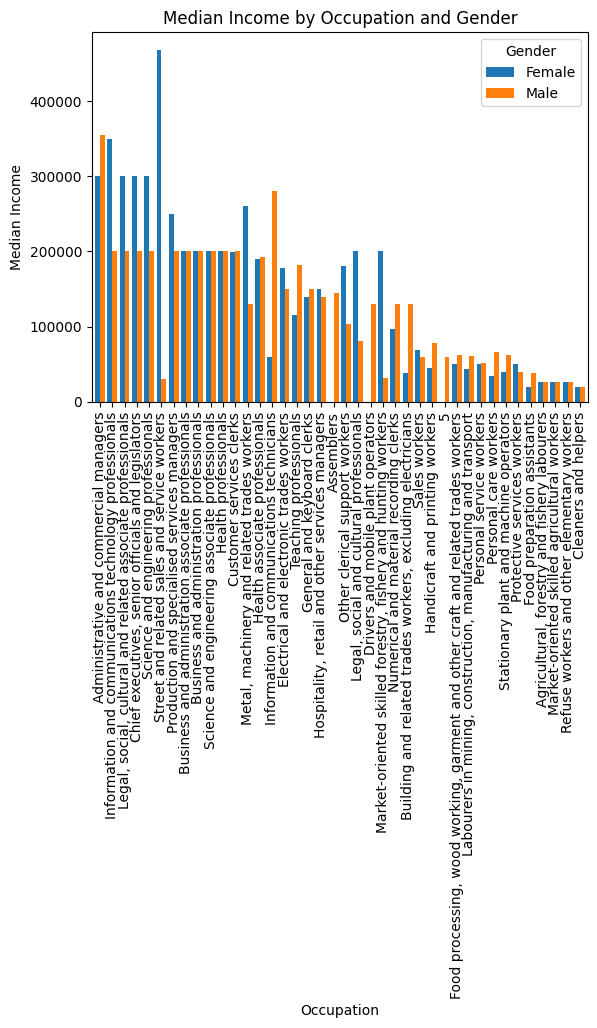

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter valid rows
df_valid = df.dropna(subset=['income_clean', 'isco2digit', 'A01'])

# Aggregate median income by occupation and gender
median_income = df_valid.groupby(['isco2digit', 'A01'])['income_clean'].median().unstack()

# Sort occupations by overall median income for better visualization
occupation_order = median_income.median(axis=1).sort_values(ascending=False).index

plt.figure(figsize=(14,8))
median_income.loc[occupation_order].plot(kind='bar', width=0.8)
plt.title('Median Income by Occupation and Gender')
plt.ylabel('Median Income')
plt.xlabel('Occupation')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()


24. Unemployment duration by
education mean(duration) x education Bar chart

In [87]:
print("Columns in dataset:", df.columns.tolist())



Columns in dataset: ['PSU_NO', 'QH_NO', 'HHID', 'pid', 'province', 'Code_UR', 'code_dis', 'LFS_year', 'weight2', 'A01', 'A02', 'A03M', 'A03Y', 'A04', 'A05', 'A06', 'A07', 'A08', 'A09', 'A10', 'A11', 'A12', 'A13', 'A14A', 'A14B', 'A15', 'A16Y', 'A17A', 'A17B', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'B01', 'B02A', 'B02B', 'B03', 'B06', 'B07', 'B08', 'B09', 'B10', 'B13', 'B13A', 'B14', 'B18', 'B19', 'C01', 'C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C09A', 'C10', 'C11A', 'C11B', 'C12A', 'C12B', 'C13A', 'C13B', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C22', 'C23', 'C24', 'C25', 'C26', 'C21', 'C21_A', 'C21_B', 'C21_C', 'C21_D', 'C21_E', 'C21_F', 'C21_G', 'C21_H', 'C21_L', 'D03A', 'D04', 'D05', 'D06', 'D07', 'D08', 'D09A', 'D09B', 'D10A', 'D10B', 'D10C', 'D10D', 'D11', 'D12', 'D12A', 'D13', 'D14', 'D15', 'D15A', 'D16', 'D17', 'D20', 'D21', 'D23', 'D27', 'D24A', 'E11', 'E12', 'E12B', 'E13', 'F01', 'F02', 'F05', 'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07', '

In [88]:
[col for col in df.columns if 'duration' in col.lower()]


[]

In [90]:
print(df['D09A'].dtype)
print(df['D09A'].unique())


object
[nan 'No' 'Yes' "Don't Know"]


In [91]:
# Check columns with 'duration' or 'time' keywords that might hold numeric values
for col in df.columns:
    if 'dur' in col.lower() or 'time' in col.lower():
        print(f"{col}: dtype={df[col].dtype}, sample values={df[col].unique()[:10]}")


timegood: dtype=float64, sample values=[nan  1.  9.  6. 16. 13. 10.  5. 21. 35.]
timeservice: dtype=float64, sample values=[nan 14. 21. 28.  3. 35. 24.  8. 13.  5.]


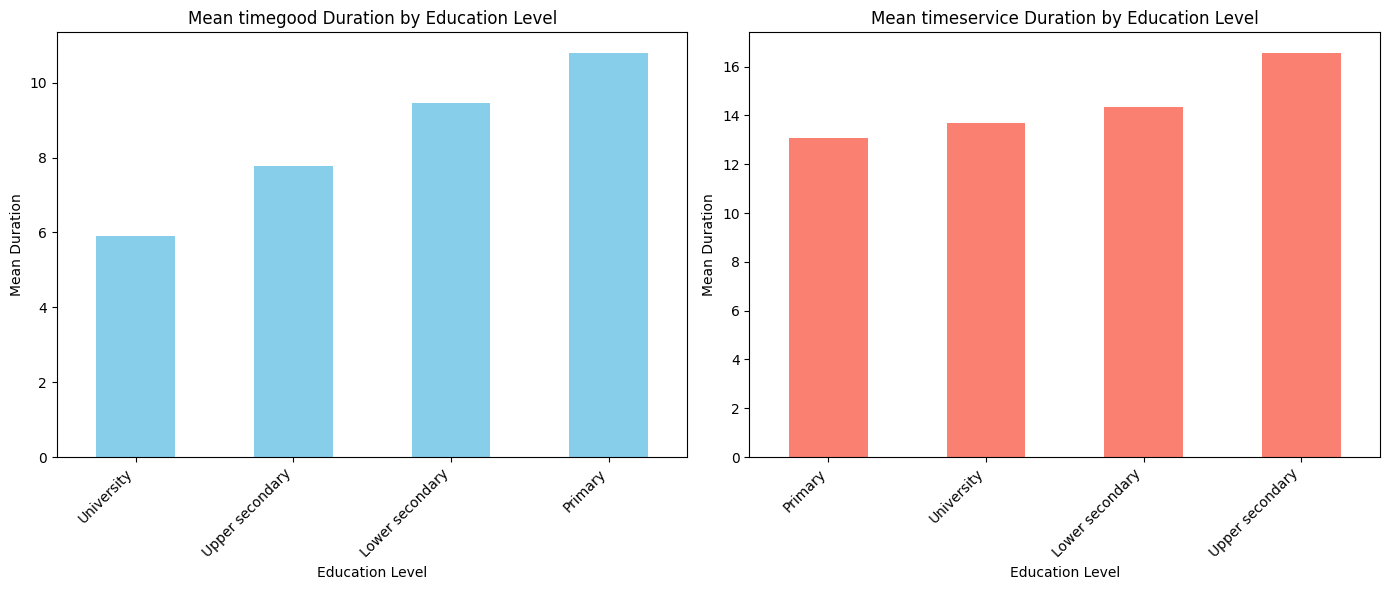

In [93]:
# Filter out rows where either column or 'attained' is missing
df_filtered = df[['timegood', 'timeservice', 'attained']].dropna()

# Calculate mean duration for each by education level
mean_timegood = df_filtered.groupby('attained')['timegood'].mean().sort_values()
mean_timeservice = df_filtered.groupby('attained')['timeservice'].mean().sort_values()

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
mean_timegood.plot(kind='bar', color='skyblue')
plt.title('Mean timegood Duration by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Mean Duration')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
mean_timeservice.plot(kind='bar', color='salmon')
plt.title('Mean timeservice Duration by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Mean Duration')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


25. Who is more likely to be part-time? Filter hours_worked < 35 Histogram or bar

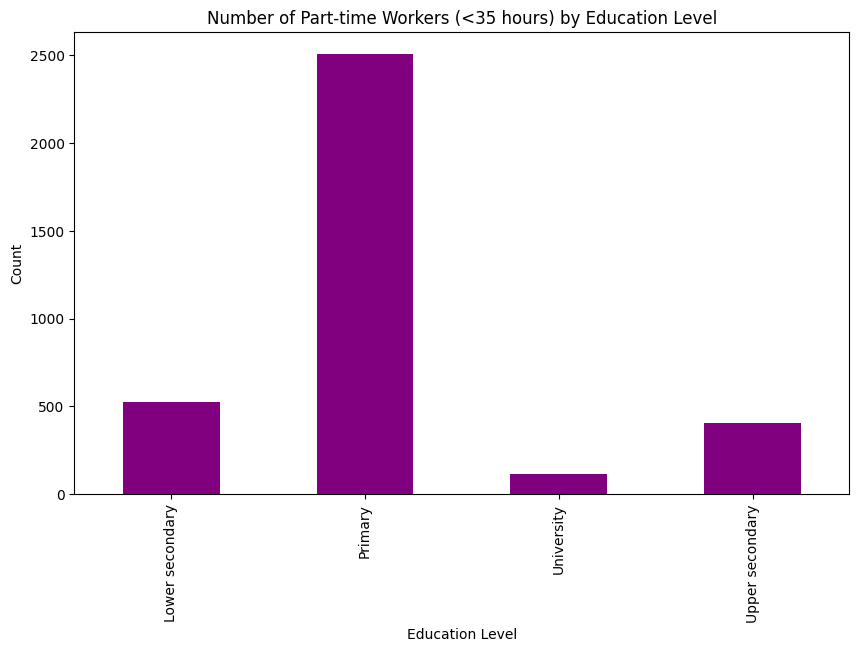

In [105]:
import matplotlib.pyplot as plt

# Drop NaNs in 'usualhrs_clean' and 'attained' to avoid errors
df_filtered = df.dropna(subset=['usualhrs_clean', 'attained'])

# Filter part-time workers (less than 35 hours)
part_time = df_filtered[df_filtered['usualhrs_clean'] < 35]

# Count by education level
part_time_counts = part_time['attained'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10,6))
part_time_counts.plot(kind='bar', color='purple')
plt.title('Number of Part-time Workers (<35 hours) by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


26. Job satisfaction by income quintile Cross-tab Stacked bar

In [107]:
print(df.columns)


Index(['PSU_NO', 'QH_NO', 'HHID', 'pid', 'province', 'Code_UR', 'code_dis',
       'LFS_year', 'weight2', 'A01',
       ...
       'indd01', 'indd03', 'inde02', 'age3_16_30', 'YUR1', 'usualhrs_clean',
       'income_clean', 'employment_status', 'age_numeric', 'job_type'],
      dtype='object', length=244)


In [108]:
# Look for columns with "job" or "satisfaction" in the name
[col for col in df.columns if 'job' in col.lower() or 'satisfaction' in col.lower()]


['job_type']

In [109]:
# Check unique values or counts of income_clean to see if it’s categorical or numeric
df['income_clean'].value_counts(dropna=False)


income_clean
NaN          57248
26000.00      2896
39000.00       993
31200.00       731
200000.00      674
             ...  
213000.00        1
56333.33         1
560000.00        1
35100.00         1
86500.00         1
Name: count, Length: 483, dtype: int64

In [110]:
df['income_quintile'] = pd.qcut(df['income_clean'].dropna(), 5, labels=[
    'Q1 (lowest)', 'Q2', 'Q3', 'Q4', 'Q5 (highest)'
])


In [111]:
df['YUR1'].value_counts(dropna=False)


YUR1
NaN      61118
0.0       8471
100.0     2260
Name: count, dtype: int64

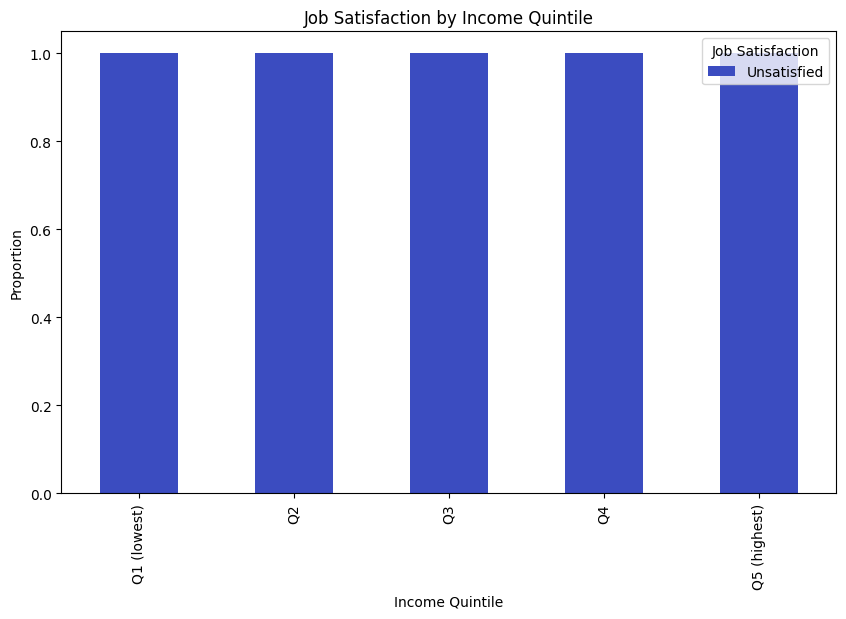

In [112]:
# Drop NaNs from income_clean and YUR1
df_clean = df.dropna(subset=['income_clean', 'YUR1'])

# Create income quintiles on income_clean
df_clean['income_quintile'] = pd.qcut(df_clean['income_clean'], 5, labels=[
    'Q1 (lowest)', 'Q2', 'Q3', 'Q4', 'Q5 (highest)'
])

# Convert YUR1 to a categorical job satisfaction variable
# Assuming 0.0 = Unsatisfied, 100.0 = Satisfied
df_clean['job_satisfaction'] = df_clean['YUR1'].map({0.0: 'Unsatisfied', 100.0: 'Satisfied'})

# Create crosstab (income quintile vs job satisfaction)
ct = pd.crosstab(df_clean['income_quintile'], df_clean['job_satisfaction'], normalize='index')

# Plot stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.title('Job Satisfaction by Income Quintile')
plt.xlabel('Income Quintile')
plt.ylabel('Proportion')
plt.legend(title='Job Satisfaction')
plt.show()


27. Dual job holders Individuals with multiple jobs Pie chart

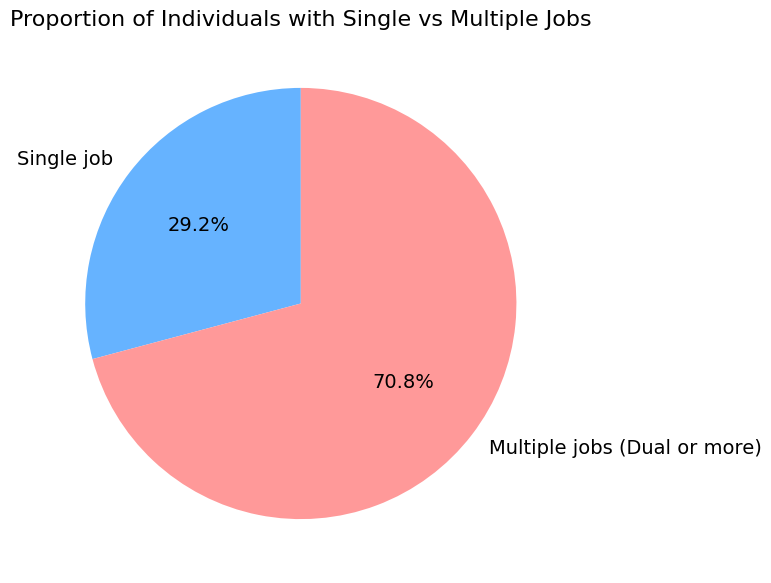

In [115]:
import matplotlib.pyplot as plt

# Count number of jobs per individual
job_counts = df['pid'].value_counts()

# Count how many individuals have 1 job vs multiple jobs
single_job = (job_counts == 1).sum()
dual_or_more_jobs = (job_counts > 1).sum()

# Data and labels for pie chart
sizes = [single_job, dual_or_more_jobs]
labels = ['Single job', 'Multiple jobs (Dual or more)']
colors = ['#66b3ff', '#ff9999']

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14})
plt.title('Proportion of Individuals with Single vs Multiple Jobs', fontsize=16)
plt.show()



28. Income vs hours worked Scatter plot + color by gender Scatter

In [117]:
possible_gender_cols = [col for col in df.columns if 'gender' in col.lower() or 'sex' in col.lower()]
for col in possible_gender_cols:
    print(f"Column: {col}")
    print(df[col].value_counts(dropna=False).head())



In [119]:
print([col for col in df.columns if 'gender' in col.lower() or 'sex' in col.lower()])


[]


In [122]:
[col for col in df.columns if 'gender' in col.lower() or 'sex' in col.lower()]

for col in df.columns:
    if df[col].dropna().astype(str).str.contains('male|female|M|F|1|2', case=False).any():
        print(col)




PSU_NO
QH_NO
HHID
pid
code_dis
LFS_year
weight2
A01
A02
A03M
A03Y
A04
A05
A06
A07
A08
A09
A10
A11
A12
A13
A14A
A14B
A16Y
A17A
A17B
A18
A19
A20
A22
B02A
B02B
B03
B09
B10
B13
B13A
B14
C05
C07
C08
C09A
C11A
C11B
C12A
C12B
C13A
C13B
C14
C15
C22
C24
C26
C21
C21_A
C21_B
C21_C
C21_D
C21_E
C21_F
C21_G
C21_L
D03A
D04
D05
D06
D07
D08
D12
D12A
D13
D15
D15A
D16
D17
D23
D24A
E11
E12
E12B
E13
F02
F05
G01
G02
G03
G04
G05
G06
G07
H02
H03
H05
H06
H09
H00
H04
H10
I01_A
I01_B
I01_C
I02
I03
I04
I05
I06A
I06B
status1
wap16
employed16
UR1
LFPR
TRU
youth
young
LUU
LUUR
disable
discourage
willing
migrant
neetyouth
neetyoung
youngs
indb1
attained
cash
intcash
age5
timegood
timeservice
hhsize
usual_h
act_hrs
acthrs
YA
hr_own
combhrs
subhrs
hr_cshmain
hr_cash
TVT2
TVET3
agdis
Prod_unit
SM
UD
IEV2
head
dG01
dG02
dG03
dG04
dG05
dG06
dG07
age3
LU2
LU3
LU4
TRUR
indb05
isco2digit
isic2digitdigit
indd01
indd03
inde02
age3_16_30
YUR1
usualhrs_clean
income_clean
employment_status
age_numeric
job_type
income_quintile


In [123]:
print(df.head())


   PSU_NO  QH_NO    HHID       pid     province Code_UR    code_dis  LFS_year  \
0    5802      1  580201  58020101  Kigali city   Rural  Nyarugenge      2023   
1    5802      1  580201  58020102  Kigali city   Rural  Nyarugenge      2023   
2    5802      1  580201  58020103  Kigali city   Rural  Nyarugenge      2023   
3    5802      2  580202  58020201  Kigali city   Rural  Nyarugenge      2023   
4    5802      2  580202  58020202  Kigali city   Rural  Nyarugenge      2023   

    weight2     A01  ...                                             indd03  \
0  26.24268    Male  ...  Whole sale and retail trade; repair of motor v...   
1  26.24268  Female  ...  Whole sale and retail trade; repair of motor v...   
2  26.24268  Female  ...                                                NaN   
3  26.24268    Male  ...                                      Manufacturing   
4  26.24268  Female  ...                                                NaN   

   inde02  age3_16_30  YUR1 usualhrs_c

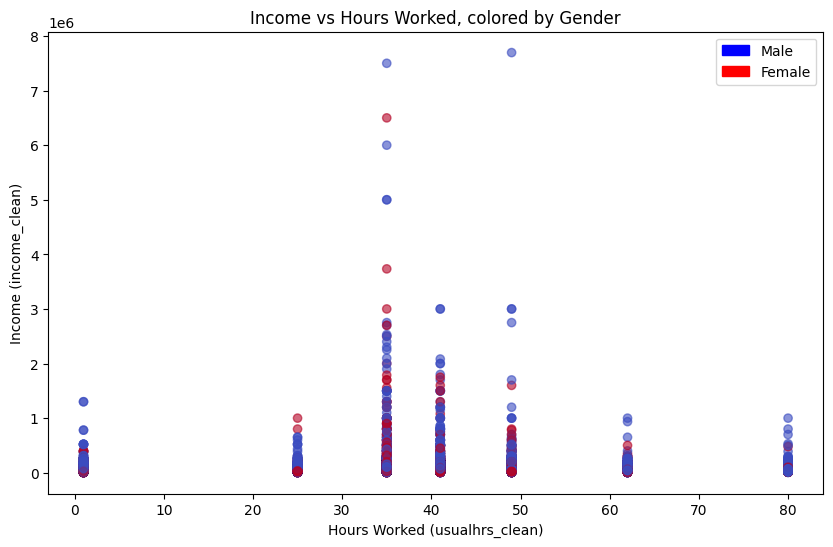

In [124]:
import matplotlib.pyplot as plt

# Drop rows with missing values in income_clean, usualhrs_clean, and A01 (gender)
df_clean = df.dropna(subset=['income_clean', 'usualhrs_clean', 'A01'])

plt.figure(figsize=(10,6))
scatter = plt.scatter(df_clean['usualhrs_clean'], df_clean['income_clean'], 
                      c=df_clean['A01'].map({'Male': 0, 'Female': 1}), cmap='coolwarm', alpha=0.6)

plt.xlabel('Hours Worked (usualhrs_clean)')
plt.ylabel('Income (income_clean)')
plt.title('Income vs Hours Worked, colored by Gender')

# Create legend manually
import matplotlib.patches as mpatches
male_patch = mpatches.Patch(color='blue', label='Male')
female_patch = mpatches.Patch(color='red', label='Female')
plt.legend(handles=[male_patch, female_patch])

plt.show()


29. Employment by household size employment_status x household size Bar

In [125]:
# Check if household size column exists, e.g. 'household_size' or 'HHsize'
print(df.columns)  # Look for household size related columns

# If not found, compute household size by counting pid per HHID
df['household_size'] = df.groupby('HHID')['pid'].transform('count')


Index(['PSU_NO', 'QH_NO', 'HHID', 'pid', 'province', 'Code_UR', 'code_dis',
       'LFS_year', 'weight2', 'A01',
       ...
       'indd03', 'inde02', 'age3_16_30', 'YUR1', 'usualhrs_clean',
       'income_clean', 'employment_status', 'age_numeric', 'job_type',
       'income_quintile'],
      dtype='object', length=245)


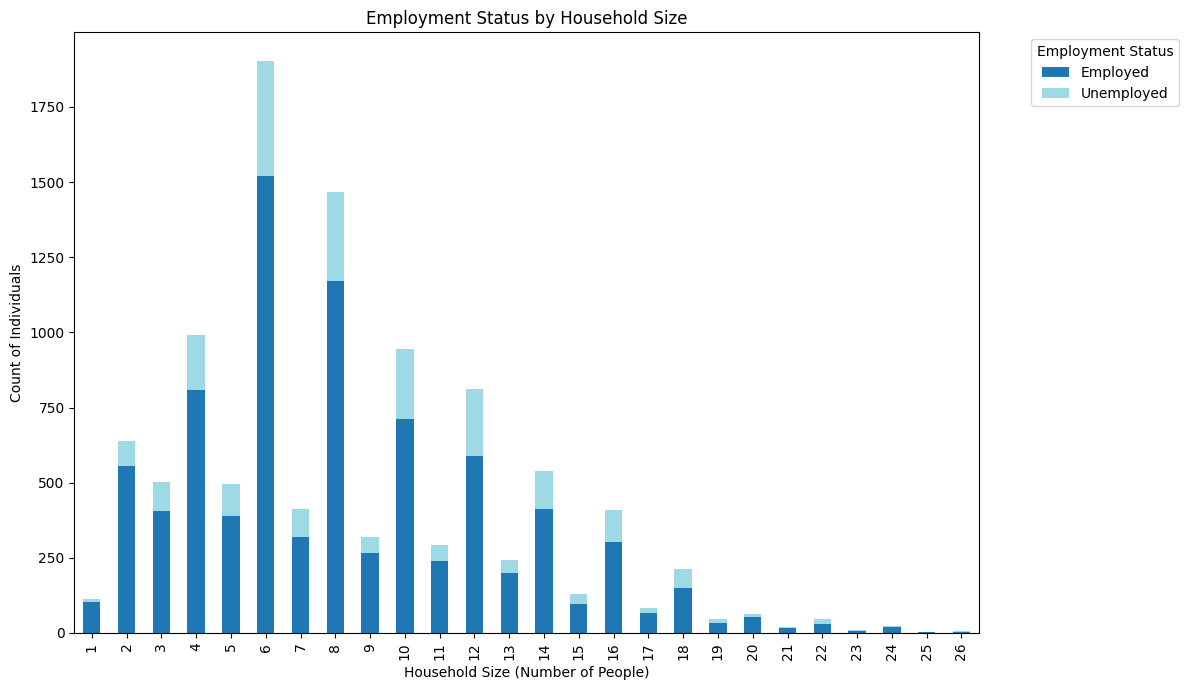

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute household size by counting pids per HHID
df['household_size'] = df.groupby('HHID')['pid'].transform('count')

# Drop rows with missing employment_status or household_size
df_clean = df.dropna(subset=['employment_status', 'household_size'])

# Crosstab of employment_status by household_size
ct = pd.crosstab(df_clean['household_size'], df_clean['employment_status'])

# Plot stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(12,7), colormap='tab20')

plt.title('Employment Status by Household Size')
plt.xlabel('Household Size (Number of People)')
plt.ylabel('Count of Individuals')
plt.legend(title='Employment Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


30. Working mothers vs fathers Filter + children + status Grouped bar

In [128]:
print([col for col in df.columns if 'child' in col.lower() or 'kid' in col.lower()])


[]


In [129]:
print([col for col in df.columns if 'household' in col.lower() or 'hh' in col.lower()])


['HHID', 'hhsize', 'household_size']


In [133]:
print(df['household_size'].describe())
print(df['household_size'].value_counts().sort_index())



count    71849.000000
mean         9.482623
std          4.323218
min          1.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         26.000000
Name: household_size, dtype: float64
household_size
1       367
2      2268
3      1800
4      4916
5      2940
6      8718
7      2576
8     10344
9      2133
10    10170
11     2167
12     8436
13     1534
14     5194
15      930
16     3312
17      612
18     1548
19      323
20      700
21      147
22      374
23       69
24      168
25       25
26       78
Name: count, dtype: int64


In [134]:
df['household_size'] = df['household_size'].fillna(0)
df['has_children'] = df['household_size'] > 2
print(df['has_children'].value_counts())


has_children
True     69214
False     2635
Name: count, dtype: int64


In [135]:
working_parents = df[
    (df['employment_status'] == 'Employed') &
    (df['A01'].isin(['Male', 'Female'])) &
    (df['has_children'])
]

print(f"Number of working parents: {len(working_parents)}")


Number of working parents: 7813


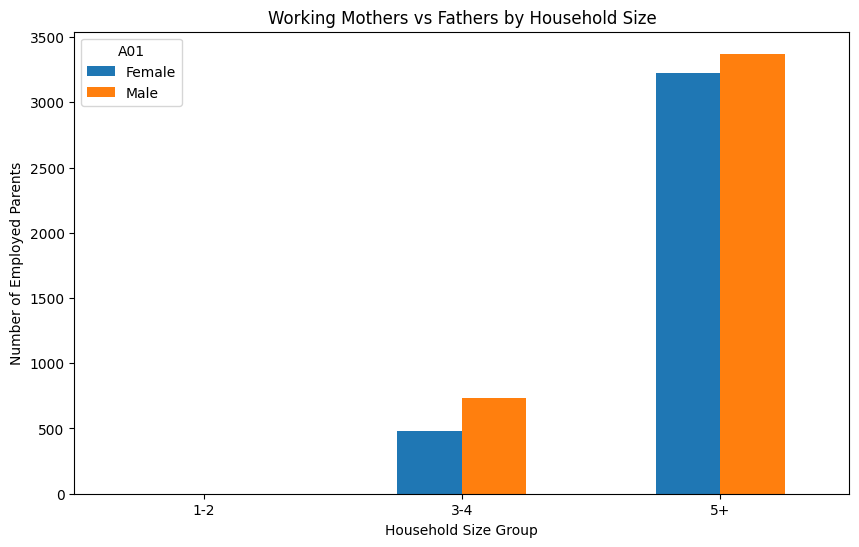

In [138]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter employed parents with children (household_size > 2 assumed as having kids)
working_parents = df[
    (df['employment_status'] == 'Employed') & 
    (df['A01'].isin(['Male', 'Female'])) & 
    (df['household_size'] > 2)
]

# Define household size bins
bins = [0, 2, 4, 100]
labels = ['1-2', '3-4', '5+']
working_parents['hhsize_group'] = pd.cut(working_parents['household_size'], bins=bins, labels=labels)

# Group by gender and household size group
summary = working_parents.groupby(['hhsize_group', 'A01']).size().unstack(fill_value=0)

# Plot grouped bar chart
summary.plot(kind='bar', figsize=(10,6))
plt.title('Working Mothers vs Fathers by Household Size')
plt.xlabel('Household Size Group')
plt.ylabel('Number of Employed Parents')
plt.xticks(rotation=0)
plt.show()


31. Retirement age distribution Age filter > 60 Histogram

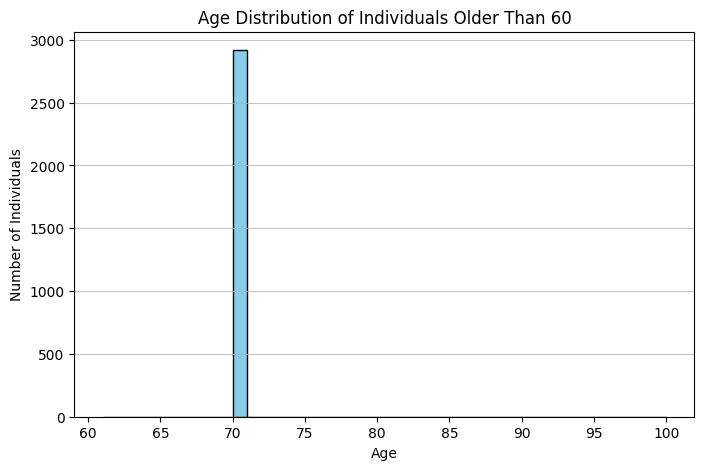

In [139]:
import matplotlib.pyplot as plt

# Filter for individuals aged above 60
retirement_age = df[df['age_numeric'] > 60]['age_numeric'].dropna()

# Plot histogram
plt.figure(figsize=(8,5))
plt.hist(retirement_age, bins=range(61, 101), edgecolor='black', color='skyblue')
plt.title('Age Distribution of Individuals Older Than 60')
plt.xlabel('Age')
plt.ylabel('Number of Individuals')
plt.xticks(range(60, 101, 5))
plt.grid(axis='y', alpha=0.75)
plt.show()


32. Region with highest unemployment unemployed x region Bar

province
Kigali city          777
Western Province     409
Eastern Province     398
Southern Province    349
Northern Province    327
Name: count, dtype: int64


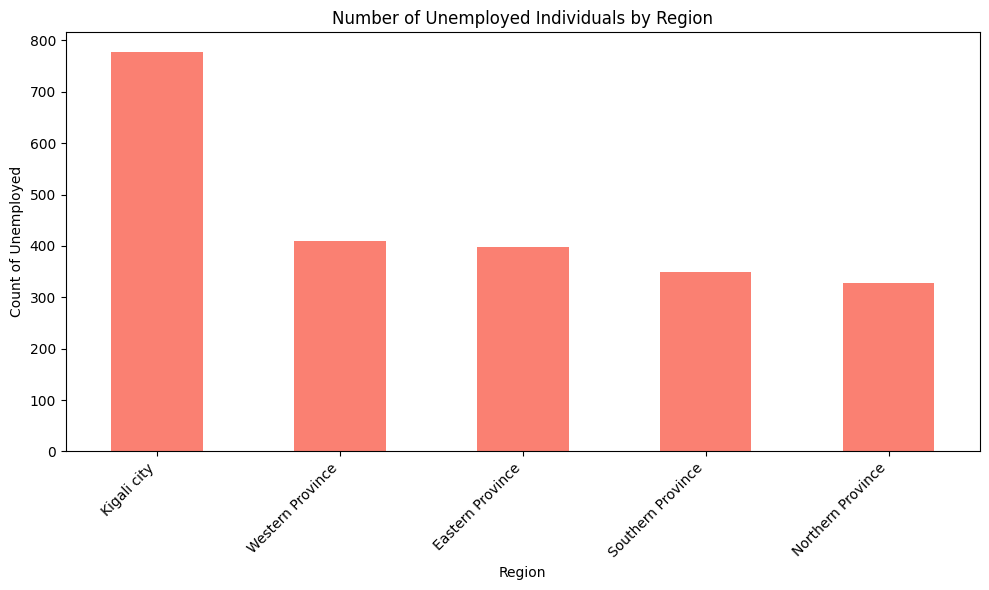

In [141]:
# Check unemployed counts per region
unemployed_counts = df[df['employment_status'] == 'Unemployed']['province'].value_counts()

print(unemployed_counts)

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
unemployed_counts.plot(kind='bar', color='salmon')
plt.title('Number of Unemployed Individuals by Region')
plt.xlabel('Region')
plt.ylabel('Count of Unemployed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


33. Self-employment rate employment_type == self-employed Pie

In [143]:
print(df['job_type'].unique())


['Formal' 'Unknown' 'Informal']


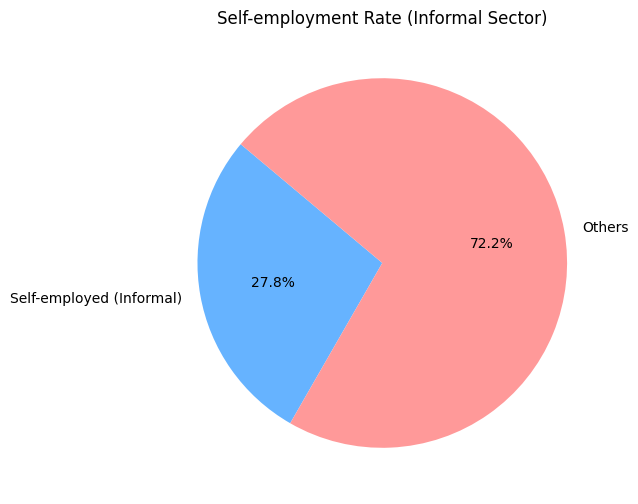

In [144]:
import matplotlib.pyplot as plt

# Count of each job_type category
job_counts = df['job_type'].value_counts()

# Assuming 'Informal' = self-employed
labels = ['Self-employed (Informal)', 'Others']
sizes = [job_counts.get('Informal', 0), job_counts.sum() - job_counts.get('Informal', 0)]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#66b3ff','#ff9999'], startangle=140)
plt.title('Self-employment Rate (Informal Sector)')
plt.show()


34. Employment by disability status employment_status x disability Stacked bar

In [145]:
[col for col in df.columns if 'disab' in col.lower()]


['disable']

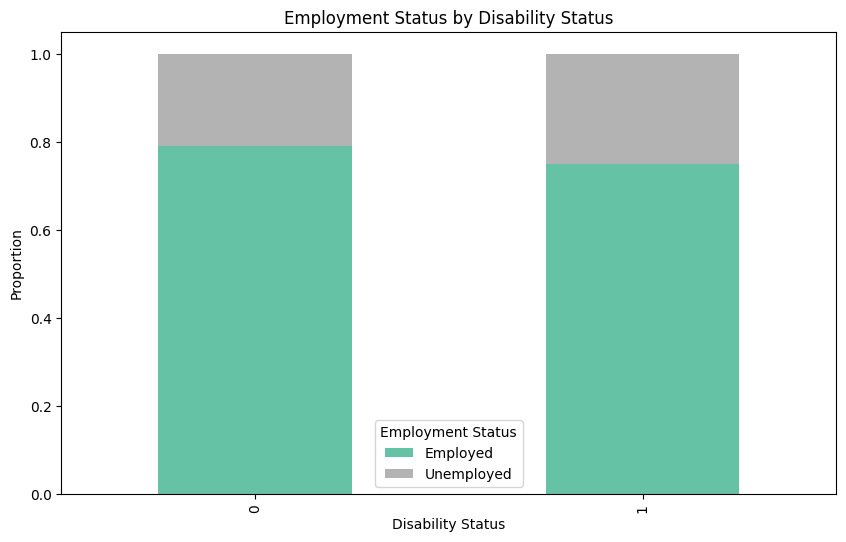

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

# Drop rows with missing values in employment_status or disable
df_clean = df.dropna(subset=['employment_status', 'disable'])

# Cross-tabulation: rows = disability status, columns = employment status
ct = pd.crosstab(df_clean['disable'], df_clean['employment_status'], normalize='index')

# Plot stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')

plt.title('Employment Status by Disability Status')
plt.xlabel('Disability Status')
plt.ylabel('Proportion')
plt.legend(title='Employment Status')
plt.show()


35. Access to benefits by sector benefit_access x sector Stacked bar

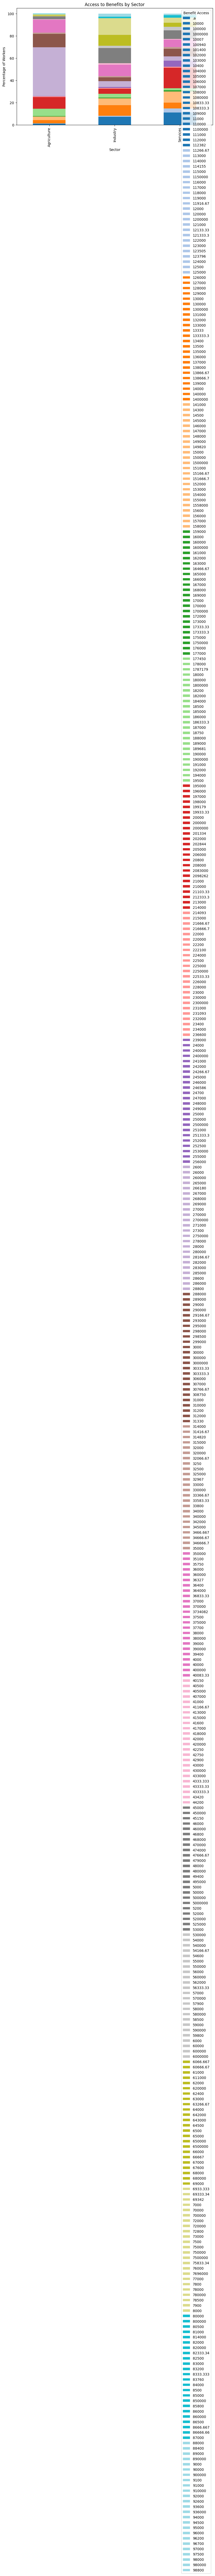

In [151]:
import matplotlib.pyplot as plt

# Group by sector and benefit access
benefit_by_sector = df.groupby(['main_sect', 'cash']).size().unstack(fill_value=0)

# Convert counts to percentages
benefit_pct = benefit_by_sector.div(benefit_by_sector.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
benefit_pct.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    colormap='tab20'
)

plt.ylabel('Percentage of Workers')
plt.xlabel('Sector')
plt.title('Access to Benefits by Sector')
plt.legend(title='Benefit Access', loc='upper right')
plt.tight_layout()
plt.show()


36. Hourly wage by occupation income/hours x occupation Violin or boxplot

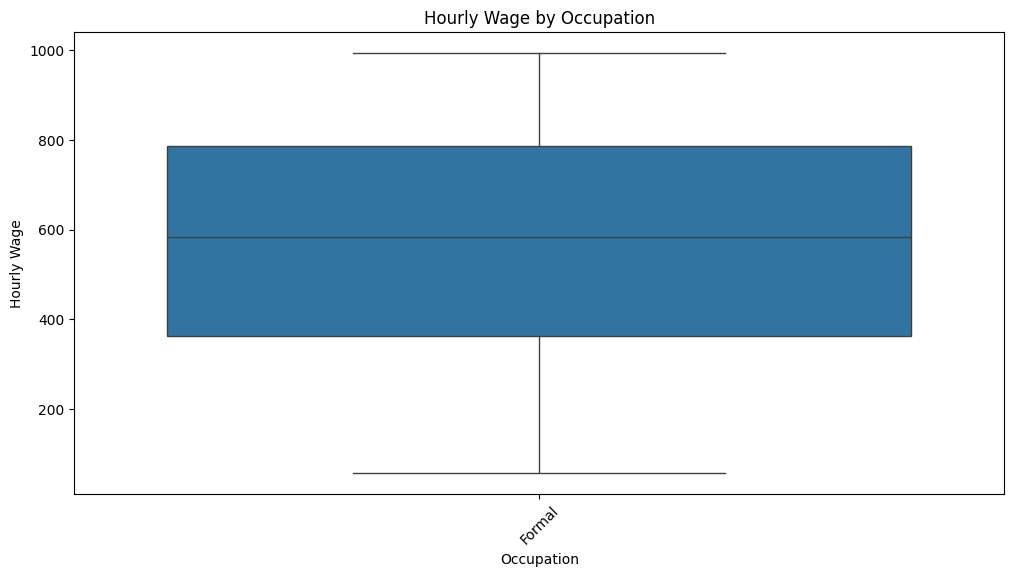

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop NaNs and unrealistic values (optional filtering)
df_plot = df.dropna(subset=["hourly_wage", "job_type"])
df_plot = df_plot[df_plot["hourly_wage"] < 1000]  # remove extreme outliers

plt.figure(figsize=(12,6))
sns.boxplot(x="job_type", y="hourly_wage", data=df_plot)

plt.xticks(rotation=45)
plt.title("Hourly Wage by Occupation")
plt.ylabel("Hourly Wage")
plt.xlabel("Occupation")
plt.show()



37. Effect of education on employment employment_status x education Bar

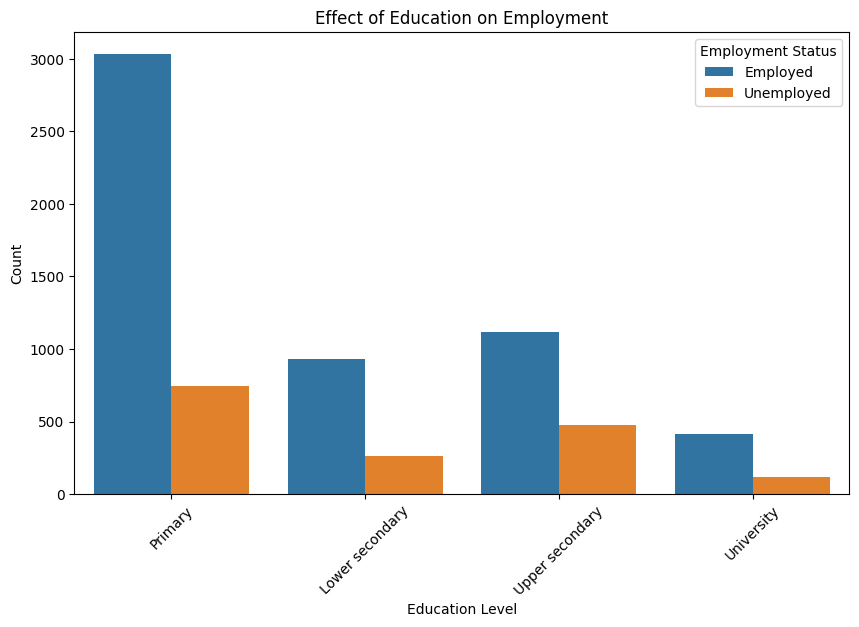

In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot of employment status by education
plt.figure(figsize=(10,6))
sns.countplot(x="attained", hue="employment_status", data=df)

plt.xticks(rotation=45)
plt.title("Effect of Education on Employment")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="Employment Status")
plt.show()


38. Temporary vs permanent contracts contract_type Pie

In [160]:
possible_cols = ['job_type', 'status1', 'employment_status', 
                 'C21', 'C21_A', 'C21_B', 'C21_C', 'C21_D', 'C21_E', 'C21_F', 'C21_G', 'C21_H', 'C21_L']

for col in possible_cols:
    if col in df.columns:
        print(f"\n--- {col} ---")
        print(df[col].dropna().unique())




--- job_type ---
['Formal' 'Unknown' 'Informal']

--- status1 ---
['Employed' 'out of labour force' 'Unemployed']

--- employment_status ---
['Employed' 'Unemployed']

--- C21 ---
['C' 'ACE' 'CE' 'AC' 'F' 'A' 'E' 'H' 'CD' 'EFG' 'G' 'CDE' 'ACF' 'CF' 'AE'
 'DFG' 'D' 'EG' 'CFG' 'BC' 'ADF' 'AF' 'BCE' 'AD' 'AEG' 'EF' 'CG' 'B' 'DE'
 'ACD' 'CDFG' 'FG' 'ABC' 'DEF' 'CDEF' 'CEFG' 'DF' 'BE' 'AB' 'AG' 'BCDE'
 'CDEG' 'DG' 'AEF' 'CDF' 'BF' 'ABE' 'BD' 'EL' 'ABEF' 'ADE' 'ACDE' 'ABCE'
 'CEF' 'CL' 'BCEF' 'AEFG' 'BDF' 'DEFG' 'DEG' 'BEF' 'BCD' 'ACFG' 'ADFG' 'L'
 'ABCD' 'CDG' 'ACEG' 'BCF' 'ABD' 'BDFG' 'ACG' 'ACDF' 'BFG' 'ADEF' 'AFG'
 'ACEF' 'ABF']

--- C21_A ---
[0. 1.]

--- C21_B ---
[0. 1.]

--- C21_C ---
[1. 0.]

--- C21_D ---
[0. 1.]

--- C21_E ---
[0. 1.]

--- C21_F ---
[0. 1.]

--- C21_G ---
[0. 1.]

--- C21_H ---
[0.]

--- C21_L ---
[0. 1.]


In [162]:
# Step 1: Select C21 columns
c21_cols = [col for col in df.columns if col.startswith("C21_")]

# Step 2: Replace NaN with 0, then convert to int
c21_data = df[c21_cols].fillna(0).astype(int)

# Step 3: Show frequency of patterns
pattern_counts = (
    c21_data
    .apply(lambda row: tuple(row), axis=1)
    .value_counts()
)

print("Top 10 most common C21_* patterns:\n")
print(pattern_counts.head(10))

# Step 4: Check correlation with job_type
for col in c21_cols:
    print(f"\n--- {col} by job_type ---")
    print(df.groupby("job_type")[col].mean())



Top 10 most common C21_* patterns:

(0, 0, 0, 0, 0, 0, 0, 0, 0)    67511
(0, 0, 0, 0, 1, 0, 0, 0, 0)     1508
(0, 0, 1, 0, 0, 0, 0, 0, 0)      705
(0, 0, 1, 0, 1, 0, 0, 0, 0)      457
(1, 0, 0, 0, 0, 0, 0, 0, 0)      350
(1, 0, 1, 0, 0, 0, 0, 0, 0)      147
(0, 0, 0, 1, 0, 0, 0, 0, 0)      108
(1, 0, 0, 0, 1, 0, 0, 0, 0)      100
(0, 0, 0, 0, 0, 1, 0, 0, 0)       64
(0, 0, 0, 0, 0, 1, 1, 0, 0)       61
Name: count, dtype: int64

--- C21_A by job_type ---
job_type
Formal           NaN
Informal         NaN
Unknown     0.196183
Name: C21_A, dtype: float64

--- C21_B by job_type ---
job_type
Formal           NaN
Informal         NaN
Unknown     0.059476
Name: C21_B, dtype: float64

--- C21_C by job_type ---
job_type
Formal           NaN
Informal         NaN
Unknown     0.389259
Name: C21_C, dtype: float64

--- C21_D by job_type ---
job_type
Formal           NaN
Informal         NaN
Unknown     0.094763
Name: C21_D, dtype: float64

--- C21_E by job_type ---
job_type
Formal           NaN
Inf

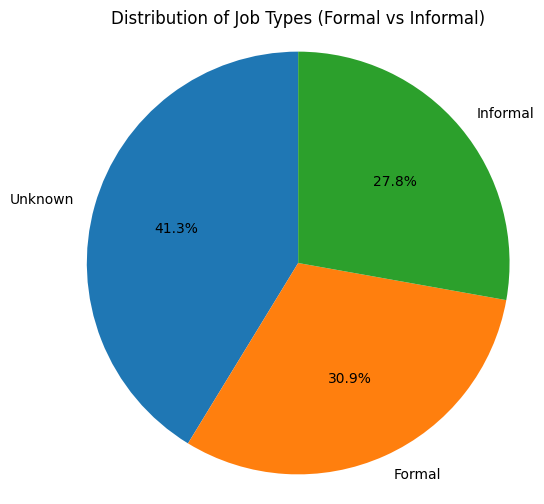

In [163]:
import matplotlib.pyplot as plt

# Count job types
job_counts = df['job_type'].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(job_counts, labels=job_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Job Types (Formal vs Informal)")
plt.axis('equal')  # Equal aspect ratio for a perfect circle
plt.show()


39. Most common occupations Top 10 occupation Bar

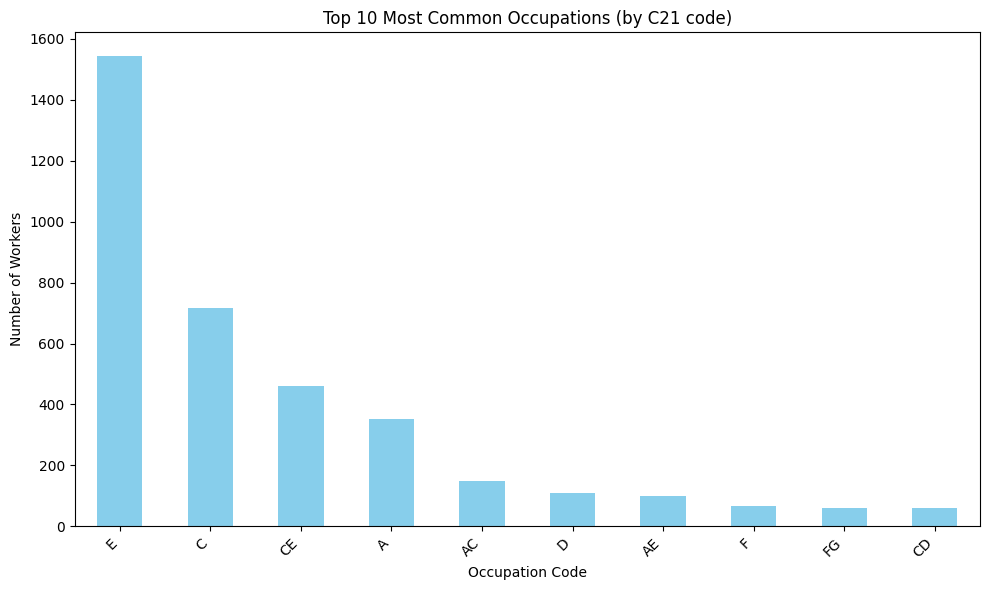

In [165]:
import matplotlib.pyplot as plt

# Get top 10 most common values in C21 (occupation code)
top_occupations = df['C21'].value_counts().head(10)

# Plot
plt.figure(figsize=(10, 6))
top_occupations.plot(kind='bar', color='skyblue')
plt.title("Top 10 Most Common Occupations (by C21 code)")
plt.xlabel("Occupation Code")
plt.ylabel("Number of Workers")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

